### Packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Model
import keras.backend as K
from sklearn.decomposition import PCA, SparsePCA
from sklearn.model_selection import train_test_split
from sklearn.utils.extmath import randomized_svd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.integrate import quad
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.interpolate import RectBivariateSpline
from keras import backend
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Φ

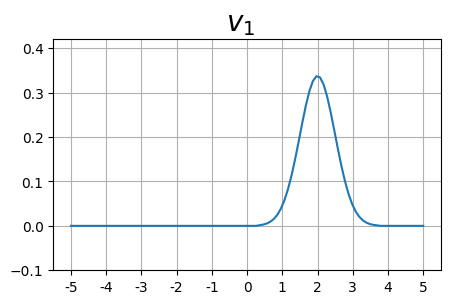

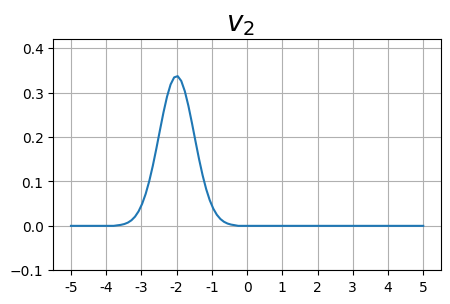

(2, 100)
[[0.99999886 0.        ]
 [0.         0.99999886]]


"\nprojection = np.transpose(phit).dot(np.linalg.inv(phit.dot(np.transpose(phit)))).dot(phit)\n\nfig, ax = plt.subplots(1, 1, figsize=(6, 6))\n# Plot the first loading vector\nax.set_xticks([i for i in range(dims)])\nax.set_yticks([i for i in range(dims)])\nax.set_xticklabels([])\nax.set_yticklabels([])\nax.grid()\nimg = ax.pcolormesh(np.reshape(projection, (dims, dims)), cmap='coolwarm', vmax=np.max(projection), vmin=np.min(projection))\nax.set_title('Projection matrix')\ncax2 = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # x, y, width, height\nfig.colorbar(img, cax=cax2)\nplt.show()\n"

In [2]:
dims = 100
start = -5
end = 5
phi1 = np.sin(np.linspace(start,end, num = dims))
phi2 = np.abs(np.sin( np.linspace(start,end, num = dims)))

phi1 = np.exp(-np.linspace(start,end, num = dims)**2/3)-0.3
phi2 = np.linspace(start,end, num = dims)*np.exp(-np.linspace(start,end, num = dims)**2/5)

phi1 = np.exp(-((np.linspace(start,end, num = dims)-2)**2)/0.5)
phi2 = np.exp(-((np.linspace(start,end, num = dims)+2)**2)/0.5)

'''
phi1 = np.sin(np.linspace(start,end, num = dims)/0.8)
phi1[0:25]= 0
phi1[25:50]= 0
phi1[75:100]=0
phi2 = np.abs(np.sin(np.linspace(start,end, num = dims)/0.8))
phi2[25:50]= 0
phi2[75:100]=0
phi2[50:75]=0
'''
'''
phi3 = np.abs(np.sin(np.linspace(start,end, num = dims)/0.8))

phi3[0:25]= 0
phi3[50:75]=0
phi4 = np.abs(np.sin(np.linspace(start,end, num = dims)/0.8))
phi4[0:25]= 0
phi4[50:75]=0
phi4[75:100]=-phi4[75:100]
'''

phi1 = phi1/np.sqrt(phi1.dot(phi1))
phi2 = phi2/np.sqrt(phi2.dot(phi2))
x = np.linspace(start, end, num=dims)

threshold = 1e-3
low_values_idx = np.where(phi1 < threshold)[0]
phi1[low_values_idx] = 0
spline = CubicSpline(x, phi1)
phi1 = spline(x)
low_values_idx = np.where(phi2 < threshold)[0]
phi2[low_values_idx] = 0
spline = CubicSpline(x, phi2)
phi2 = spline(x)

'''
phi3 = phi3/np.sqrt(phi3.dot(phi3))
phi4 = phi4/np.sqrt(phi4.dot(phi4))
'''
'''
phi1= np.sqrt(2)*np.cos(np.pi*np.linspace(start,end, num = dims))
phi2= np.sqrt(2)*np.sin(np.pi*np.linspace(start,end, num = dims))
phi3= np.sqrt(2)*np.cos(3*np.pi*np.linspace(start,end, num = dims))
phi4= np.sqrt(2)*np.sin(3*np.pi*np.linspace(start,end, num = dims))
'''
'''
for i in range(len(phi1)):
  if phi1[i]< 10**(-3):
      phi1[i] = 0.0
  if phi2[i]< 10**(-3):
      phi2[i] = 0.0
'''
'''
plt.plot(phi1)
plt.title('True first loading vector')
plt.ylim([np.min([phi1,phi2])-0.05, np.max([phi1,phi2])+0.05])
plt.show()

plt.plot(phi2)
plt.ylim([np.min([phi1,phi2])-0.05, np.max([phi1,phi2])+0.05])
plt.title('True second loading vector')
plt.show()
'''
fig, axs = plt.subplots(1, 1, figsize=(5, 3))
x_ticks = np.linspace(-5, 5, 11)  # 目标x轴刻度值

for i in range(1):
    row = i // 3

    axs.plot(phi1)
    axs.set_xticks(np.linspace(0, dims-1, 11))  # 设置刻度位置
    axs.set_xticklabels([int(tick) for tick in x_ticks])  # 设置刻度标签
    #axs[row, col].set_yticks(np.linspace(-4, 4, 7))  # 设置刻度位置
    #axs[row, col].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])  # 设置刻度标签
    axs.set_ylim(-0.1,0.42)
    axs.grid()


fig.suptitle(fr'$v_1$',fontsize = 20)
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(5, 3))
x_ticks = np.linspace(-5, 5, 11)  # 目标x轴刻度值

for i in range(1):
    row = i // 3

    axs.plot(phi2)
    axs.set_xticks(np.linspace(0, dims-1, 11))  # 设置刻度位置
    axs.set_xticklabels([int(tick) for tick in x_ticks])  # 设置刻度标签
    #axs[row, col].set_yticks(np.linspace(-4, 4, 7))  # 设置刻度位置
    #axs[row, col].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])  # 设置刻度标签
    axs.set_ylim(-0.1,0.42)
    axs.grid()

fig.suptitle(fr'$v_2$',fontsize = 20)
plt.show()
'''
fig, axs = plt.subplots(1, 1, figsize=(5, 3))
x_ticks = np.linspace(-5, 5, 9)  # 目标x轴刻度值

for i in range(1):
    row = i // 3

    axs.plot(phi3)
    axs.set_xticks(np.linspace(0, dims-1, 9))  # 设置刻度位置
    axs.set_xticklabels([int(tick) for tick in x_ticks])  # 设置刻度标签
    #axs[row, col].set_yticks(np.linspace(-4, 4, 7))  # 设置刻度位置
    #axs[row, col].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])  # 设置刻度标签
    axs.set_ylim(-0.23,0.23)
    axs.grid()

fig.suptitle('True third loading vector')
plt.show()

fig, axs = plt.subplots(1, 1, figsize=(5, 3))
x_ticks = np.linspace(-5, 5, 9)  # 目标x轴刻度值

for i in range(1):
    row = i // 3

    axs.plot(phi4)
    axs.set_xticks(np.linspace(0, dims-1, 9))  # 设置刻度位置
    axs.set_xticklabels([int(tick) for tick in x_ticks])  # 设置刻度标签
    #axs[row, col].set_yticks(np.linspace(-4, 4, 7))  # 设置刻度位置
    #axs[row, col].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])  # 设置刻度标签
    axs.set_ylim(-0.23,0.23)
    axs.grid()

fig.suptitle('True fourth loading vector')
plt.show()
'''
phit = pd.DataFrame([phi1,phi2])
phit = np.array(phit)
print(phit.shape)
print(phit.dot(np.transpose(phit)))
'''
projection = np.transpose(phit).dot(np.linalg.inv(phit.dot(np.transpose(phit)))).dot(phit)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# Plot the first loading vector
ax.set_xticks([i for i in range(dims)])
ax.set_yticks([i for i in range(dims)])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()
img = ax.pcolormesh(np.reshape(projection, (dims, dims)), cmap='coolwarm', vmax=np.max(projection), vmin=np.min(projection))
ax.set_title('Projection matrix')
cax2 = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # x, y, width, height
fig.colorbar(img, cax=cax2)
plt.show()
'''

### Data Generator

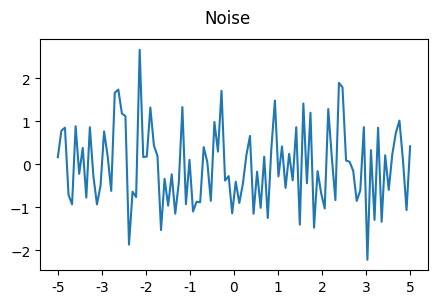

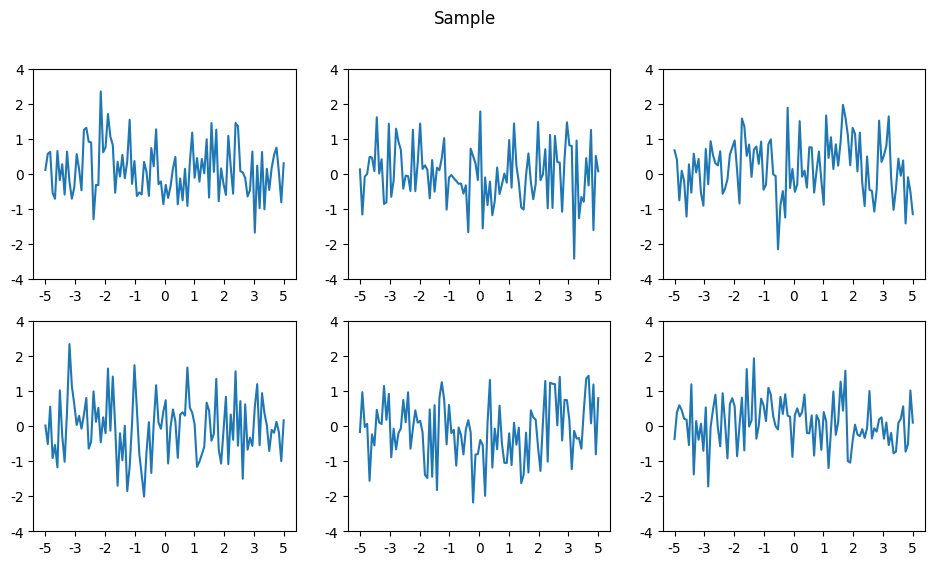

In [3]:
def poissondatagenerator(phit = phit, seeds = 1, means = [0,0], covmat = 2, numsample = 200, dim2 = 1, num_plots=6, linearity = 'linear'):
    np.random.seed(seed=seeds+156)
    xdim = int(np.sqrt(phit.shape[1]))
    covmat2 = []
    cov = [9,4,3,2]
    for i in range(covmat):
      covmat2.append(cov[i])
    covmat = np.diag(covmat2)

    xi = np.random.multivariate_normal(means,covmat,numsample)
    start = -5
    end = 5
    dim = phit.shape[1]
    np.random.seed(seed=(seeds+156)*2)
    epsilon = np.reshape(np.random.normal(0,1,numsample*dim),(numsample,dim))
    z = np.exp(xi.dot(phit))
    lambda_ = xi.dot(phit)
    np.random.seed(seed=(seeds+156)*3)
    Y = np.random.poisson(z)
    if linearity == 'linear':
      Y = xi.dot(phit) + epsilon
    else:
      miu =  np.reshape(np.tile(np.linspace(start,end, num = dims),numsample),(numsample,-1)) + np.reshape(np.sin(np.pi*np.tile(np.linspace(start,end, num = dims),numsample)),(numsample,-1))
      Y = 2*np.sin(np.pi*(xi.dot(phit))/3)+ ((xi.dot(phit)**3)/1.5) + epsilon + miu
      Y = np.sin(xi.dot(phit)*np.exp(xi.dot(phit))) + epsilon
    Y2 = xi.dot(phit)
    if covmat[1,1] == 0:
      projection = np.reshape(phit[0,:],(dims,1)).dot(np.reshape(phit[0,:],(1,dims)))
    else:
      projection = np.transpose(phit).dot(np.linalg.inv(phit.dot(np.transpose(phit)))).dot(phit)

    if dim2 == 2:
      fig, axs = plt.subplots(2, 3, figsize=(10, 7))
      for i in range(num_plots):
          row = i // 3
          col = i % 3
          axs[row, col].set_xticks([])
          axs[row, col].set_yticks([])
          axs[row, col].set_xticklabels([])
          axs[row, col].set_yticklabels([])
          axs[row, col].pcolormesh(np.reshape(Y[i], (xdim, xdim)), cmap='gray', vmax=np.max(phit), vmin=-np.max(phit))
          axs[row, col].grid()
          axs[row, col].set_title(f'Sample {i+1}')
      fig.suptitle('Samples')
      plt.show()


    if dim2 == 1:
      fig, axs = plt.subplots(1, 1, figsize=(5, 3))
      x_ticks = np.linspace(-5, 5, 9)  # 目标x轴刻度值

      for i in range(1):
          row = i // 3

          axs.plot(epsilon[i])
          axs.set_xticks(np.linspace(0, dim-1, 9))  # 设置刻度位置
          axs.set_xticklabels([int(tick) for tick in x_ticks])  # 设置刻度标签
          #axs[row, col].set_yticks(np.linspace(-4, 4, 7))  # 设置刻度位置
          #axs[row, col].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])  # 设置刻度标签


      fig.suptitle('Noise')
      plt.show()

      fig, axs = plt.subplots(2,3, figsize=(11.5,6))
      x_ticks = np.linspace(-5, 5, 9)  # 目标x轴刻度值

      for i in range(6):
          row = i // 3
          col = i % 3
          axs[row, col].plot(Y[i])
          axs[row, col].set_xticks(np.linspace(0, dim-1, 9))  # 设置刻度位置
          axs[row, col].set_xticklabels([int(tick) for tick in x_ticks])  # 设置刻度标签
          axs[row, col].set_yticks(np.linspace(-4, 4, 7))  # 设置刻度位置
          axs[row, col].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])  # 设置刻度标签


      fig.suptitle('Sample')
      plt.show()

    return Y, projection, lambda_


Y, projection, lambda_= poissondatagenerator(linearity = 'nonlinear')

### 1D models

In [4]:

def cae10(xdim , kernelshape0 , activations , j ,ncomp, pcloading, padding0 = 'same', bias = True):

  class CAELossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.l1_penalty_sum = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        l1_penalty = 0.0
        for layer in self.model.layers:
            if isinstance(layer, tf.keras.layers.Dense) and layer.kernel_regularizer:
                if isinstance(layer.kernel_regularizer, tf.keras.regularizers.L1):
                    l1_penalty += np.sum(np.abs(layer.get_weights()[0]))
        self.l1_penalty_sum.append(l1_penalty)

  if padding0 == 'same':
    b = tf.keras.initializers.Constant(pcloading)
  else:
    b = None
  center = int(kernelshape0 / 2 - 0.5)
  kernel = np.zeros(kernelshape0)

  c = np.zeros(kernelshape0)

  for i in range(kernelshape0):
    c[i]=np.exp(-(i-kernelshape0/2+0.5)**2)

  c = np.zeros(kernelshape0)
  c[int(kernelshape0/2-0.5)] = 1

  c= c/np.sqrt(np.sum(c**2))


  inputs = keras.Input((xdim,1))
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(inputs)
  x = layers.Flatten()(x)
  code = layers.Dense(ncomp,name = 'code',use_bias = bias, kernel_regularizer=tf.keras.regularizers.L1(j),kernel_initializer=b)(x)
  x = layers.Dense(xdim,use_bias = bias, activation = activations,kernel_initializer=tf.keras.initializers.Constant(np.transpose(pcloading)))(code)
  x = layers.Reshape((xdim,1))(x)
  outputs = layers.Flatten()(x)
  cae1 = Model(inputs = inputs, outputs = outputs)
  cae1.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.mse, metrics = ['mse'])
  CAEhistory1 = CAELossHistory()
  return cae1, CAEhistory1

def cae30(xdim , kernelshape0 , activations , j ,ncomp, pcloading, padding0 = 'same', bias = True):

  class CAELossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.l1_penalty_sum = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        l1_penalty = 0.0
        for layer in self.model.layers:
            if isinstance(layer, tf.keras.layers.Dense) and layer.kernel_regularizer:
                if isinstance(layer.kernel_regularizer, tf.keras.regularizers.L1):
                    l1_penalty += np.sum(np.abs(layer.get_weights()[0]))
        self.l1_penalty_sum.append(l1_penalty)
  center = int(kernelshape0 / 2 - 0.5)
  kernel = np.zeros(kernelshape0)

  c = np.zeros(kernelshape0)

  for i in range(kernelshape0):
    c[i]=np.exp(-(i-kernelshape0/2+0.5)**2)

  c = np.zeros(kernelshape0)
  c[int(kernelshape0/2-0.5)] = 1

  c= c/np.sqrt(np.sum(c**2))

  if padding0 == 'same':
    b = tf.keras.initializers.Constant(pcloading)
  else:
    b = None
  inputs = keras.Input((xdim,1))
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(inputs)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Flatten()(x)
  code = layers.Dense(ncomp,name = 'code',use_bias = bias, kernel_regularizer=tf.keras.regularizers.L1(j),kernel_initializer=b)(x)
  x = layers.Dense(xdim,use_bias = bias, activation = activations,kernel_initializer=tf.keras.initializers.Constant(np.transpose(pcloading)))(code)
  x = layers.Reshape((xdim,1))(x)
  outputs = layers.Flatten()(x)
  cae3 = Model(inputs = inputs, outputs = outputs)
  cae3.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.mse, metrics = ['mse'])
  CAEhistory3 = CAELossHistory()
  return cae3, CAEhistory3

def cae50(xdim , kernelshape0 , activations , j ,ncomp, pcloading, padding0 = 'same', bias = True):

  class CAELossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.l1_penalty_sum = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        l1_penalty = 0.0
        for layer in self.model.layers:
            if isinstance(layer, tf.keras.layers.Dense) and layer.kernel_regularizer:
                if isinstance(layer.kernel_regularizer, tf.keras.regularizers.L1):
                    l1_penalty += np.sum(np.abs(layer.get_weights()[0]))
        self.l1_penalty_sum.append(l1_penalty)
  c = np.zeros(kernelshape0)
  if padding0 == 'same':
    b = tf.keras.initializers.Constant(pcloading)
  else:
    b = None
  for i in range(kernelshape0):
    c[i]=np.exp(-(i-kernelshape0/2+0.5)**2)

  c = np.zeros(kernelshape0)
  c[int(kernelshape0/2-0.5)] = 1
  c= c/np.sqrt(np.sum(c**2))
  inputs = keras.Input((xdim,1))
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(inputs)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Flatten()(x)
  code = layers.Dense(ncomp,name = 'code',use_bias = bias, kernel_regularizer=tf.keras.regularizers.L1(j),kernel_initializer=b)(x)
  x = layers.Dense(xdim,use_bias = bias, activation = activations,kernel_initializer=tf.keras.initializers.Constant(np.transpose(pcloading)))(code)
  x = layers.Reshape((xdim,1))(x)
  outputs = layers.Flatten()(x)
  cae5 = Model(inputs = inputs, outputs = outputs)
  cae5.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.mse, metrics = ['mse'])
  CAEhistory5 = CAELossHistory()
  return cae5, CAEhistory5

def cae70(xdim , kernelshape0 , activations , j ,ncomp, pcloading, padding0 = 'same',bias = True):

  class CAELossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.l1_penalty_sum = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        l1_penalty = 0.0
        for layer in self.model.layers:
            if isinstance(layer, tf.keras.layers.Dense) and layer.kernel_regularizer:
                if isinstance(layer.kernel_regularizer, tf.keras.regularizers.L1):
                    l1_penalty += np.sum(np.abs(layer.get_weights()[0]))
        self.l1_penalty_sum.append(l1_penalty)

  c = np.zeros(kernelshape0)

  for i in range(kernelshape0):
    c[i]=np.exp(-(i-kernelshape0/2+0.5)**2)
  c = np.zeros(kernelshape0)
  c[int(kernelshape0/2-0.5)] = 1
  c= c/np.sqrt(np.sum(c**2))

  if padding0 == 'same':
    b = tf.keras.initializers.Constant(pcloading)
  else:
    b = None
  inputs = keras.Input((xdim,1))
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(inputs)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = padding0, activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = 'same', activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = 'same', activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Conv1D(1,kernel_size = kernelshape0,use_bias = bias, padding = 'same', activation = activations, kernel_constraint=tf.keras.constraints.UnitNorm(),kernel_initializer=tf.keras.initializers.Constant(c))(x)
  x = layers.Flatten()(x)
  code = layers.Dense(ncomp,name = 'code',use_bias = bias, kernel_regularizer=tf.keras.regularizers.L1(j),kernel_initializer=b)(x)
  x = layers.Dense(xdim,use_bias = bias, activation = activations,kernel_initializer=tf.keras.initializers.Constant(np.transpose(pcloading)))(code)
  x = layers.Reshape((xdim,1))(x)
  outputs = layers.Flatten()(x)
  cae7 = Model(inputs = inputs, outputs = outputs)
  cae7.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.mse, metrics = ['mse'])
  CAEhistory7 = CAELossHistory()
  return cae7, CAEhistory7

def sae0(xdim , activations , j ,ncomp, pcloading, bias = True):

  class SAELossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.l1_penalty_sum = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        l1_penalty = 0.0
        for layer in self.model.layers:
            if isinstance(layer, tf.keras.layers.Dense) and layer.kernel_regularizer:
                if isinstance(layer.kernel_regularizer, tf.keras.regularizers.L1):
                    l1_penalty += np.sum(np.abs(layer.get_weights()[0]))
        self.l1_penalty_sum.append(l1_penalty)
  inputs1 = keras.Input((xdim,1))
  x1 = layers.Flatten()(inputs1)
  code1 = layers.Dense(ncomp,name = 'code',use_bias = bias, kernel_regularizer=tf.keras.regularizers.L1(j), activation = activations,kernel_initializer=tf.keras.initializers.Constant(pcloading))(x1)
  outputs2 = layers.Dense(xdim,name = 'reconstruct',use_bias = bias,kernel_initializer=tf.keras.initializers.Constant(np.transpose(pcloading)))(code1)
  sae = Model(inputs = inputs1, outputs = outputs2)
  sae.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.mse, metrics = ['mse'])
  SAEhistory = SAELossHistory()
  return sae, SAEhistory


### 1D functions

In [8]:
#lambdas = [0]
lambdas = [0,0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095,0.1]
#lambdas = np.concatenate([np.repeat(0.0,7),np.repeat(0.05,7)])
size = [7,11,15,19]
#size = [3]
ncomps = [2,3,4]
def spatialAE1D(Y = Y, ncomp = ncomps, activations = None, epoches = 150, dx = 0.1, phit = phit, p = projection,lambda1 = lambdas,kernelshape = size, conti = 1, lambda_ = lambda_, padding0 = 'same'):
  xdim = Y.shape[1]
  for i in range(Y.shape[1]):
     Y[:,i] = Y[:,i] - np.mean(Y[:,i])


  Y_train, Y_test,lambda_train,lambda_test = train_test_split(Y,lambda_, test_size = 100, random_state=42)
  Y_train, Y_valid = train_test_split(Y_train, test_size = 80, random_state=30)
  Y_train= Y_train*1.0
  Y_valid = Y_valid*1.0
  Y_test = Y_test*1.0
  lambda_train = lambda_train*1.0
  lambda_test = lambda_test*1.0

  loss31 = []
  loss21 = []
  loss41 = []
  loss33 = []
  loss23 = []
  loss43 = []
  loss35 = []
  loss25 = []
  loss45 = []
  gridsearchcae1 = []
  gridsearchcae3 = []
  gridsearchcae5 = []

  ressaes = []
  gridsearchsae = []
  respcas = []
  resspcas = []
  respcavalids = []
  resspcavalids = []
  gridsearchspca = []

  fubae21 = []
  fubae31 = []
  fubae41 = []
  fubae23 = []
  fubae33 = []
  fubae43 = []
  fubae25 = []
  fubae35 = []
  fubae45 = []
  fubsaes = []
  fubspcas = []
  sfubindex = []
  cfub1index = []
  cfub3index = []
  cfub5index = []
  gridindex = 0
  for ncomp in ncomps:
    for kernelshape0 in kernelshape:
      lambdaindex = 0
      for j in lambda1:
        gridindex = gridindex + 1
        #PCA
        pca = PCA(n_components=ncomp)
        pca.fit(Y_train)
        pcloading = np.transpose(pca.components_)
        ppca = pcloading.dot(np.transpose(pcloading))
        #ppca = pcloading.dot(np.diag(pca.singular_values_)).dot(np.transpose(pcloading))
        pctrain = pca.fit_transform(Y_train)
        pctest = pca.transform(Y_test)
        pcvalid = pca.transform(Y_valid)
        reconpcatrain = pca.inverse_transform(pctrain)
        reconpcatest = pca.inverse_transform(pctest)
        reconpcavalid = pca.inverse_transform(pcvalid)
        respcatrain = np.mean(tf.keras.metrics.mean_squared_error(reconpcatrain,Y_train))
        respcatest = np.mean(tf.keras.metrics.mean_squared_error(reconpcatest,Y_test))
        respcavalid = np.mean(tf.keras.metrics.mean_squared_error(reconpcavalid,Y_valid))
        respcas.append(respcatest)
        respcavalids.append(respcavalid)
        pcalhat = np.mean(reconpcatest,axis = 0)
        pcatestgof = np.mean(np.mean((reconpcatest-lambda_test)**2))


        #SPCA
        '''
        spca = SparsePCA(n_components=ncomp,alpha = j*25)
        spca.fit(Y_train)
        spcloading = np.transpose(spca.components_)
        spctrain = spca.fit_transform(Y_train)
        spctest = spca.transform(Y_test)
        spcvalid = spca.transform(Y_valid)
        spccov = pd.DataFrame.cov(pd.DataFrame(spctrain))
        reconspcatrain = spca.inverse_transform(spctrain)
        reconspcatest = spca.inverse_transform(spctest)
        reconspcavalid = spca.inverse_transform(spcvalid)
        pspca = spcloading.dot(np.transpose(spcloading).dot(spcloading)).dot(np.transpose(spcloading))
        #pspca = spcloading.dot(spccov).dot(np.transpose(spcloading))
        resspcatrain = np.mean(tf.keras.metrics.mean_squared_error(reconspcatrain,Y_train))
        resspcatest = np.mean(tf.keras.metrics.mean_squared_error(reconspcatest,Y_test))
        resspcavalid = np.mean(tf.keras.metrics.mean_squared_error(reconspcavalid,Y_valid))
        resspcas.append(resspcatest)
        gridsearchspca.append(resspcatest)
        resspcavalids.append(resspcavalid)
        spcalhat = np.mean(reconspcatest,axis = 0)
        spcatestgof = np.mean(np.mean((reconspcatest-lambda_test)**2))
        #print('SPCA loading',np.transpose(spcloading).dot(spcloading))
        '''
        #CAE
        cae1, CAEhistory1 = cae10(xdim , kernelshape0 , activations , j ,ncomp, pcloading, padding0, bias = False)
        cae3, CAEhistory3 = cae30(xdim , kernelshape0 , activations , j ,ncomp, pcloading, padding0, bias = False)
        cae5, CAEhistory5 = cae50(xdim , kernelshape0 , activations , j ,ncomp, pcloading, padding0, bias = False)
        cae7, CAEhistory7 = cae70(xdim , kernelshape0 , activations , j ,ncomp, pcloading, padding0, bias = False)
        sae, SAEhistory = sae0(xdim , activations , j ,ncomp, pcloading, bias = False)
        early_stopping = EarlyStopping(monitor='loss', min_delta=0.01, patience=20)


        #weight loading
        lambdaindex = lambdaindex+1
        j2 = np.array(lambda1)
        if lambdaindex > 1:
          j3 = j2[lambdaindex-2]

          cae1.load_weights('./cae1%f.h5'%j3)
          #cae3.load_weights('./cae3%f.h5'%j3)
          #cae5.load_weights('./cae5%f.h5'%j3)
          #cae7.load_weights('./cae7%f.h5'%j3)
          sae.load_weights('./sae%f.h5'%j3)
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.ylim(-0.2,1.1)
            plt.title(fr'$c_{{m}}$, M=1, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$c_{1}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
            plt.show()
            plt.plot(np.reshape(cae1.layers[3].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=1, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae1.layers[4].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=1, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''


          cae1.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, verbose = 0, batch_size = Y_train.shape[0],callbacks = [CAEhistory1,early_stopping])
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.ylim(-0.2,1.1)
            plt.title(fr'$c_{{m}}$, M=1, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$c_{1}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.show()
          '''
          '''
          plt.plot(np.reshape(cae1.layers[3].weights[0].numpy(),(xdim,2)))
          plt.title(fr'$W_{{2}}$, M=1, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{2,1}}$',r'$w_{{2,2}}$'],fontsize = 20)
          plt.show()
          plt.plot(np.transpose(cae1.layers[4].weights[0].numpy()))
          plt.title(fr'$W_{{3}}$, M=1, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{3,1}}$',r'$w_{{3,2}}$'],fontsize = 20)
          plt.show()
          '''


          conv1_weights = cae1.layers[1].get_weights()
          dense_weights = cae1.layers[3].get_weights()
          dense_weights2 = cae1.layers[4].get_weights()

          cae3.layers[1].set_weights(conv1_weights)
          cae3.layers[4].set_weights(dense_weights)
          cae3.layers[5].set_weights(dense_weights2)

          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.title(fr'$c_{{m}}$, M=2, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)


            plt.ylim(-0.2,1.1)
            plt.show()
            plt.plot(np.reshape(cae3.layers[4].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=2, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae3.layers[5].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=2, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''
          cae3.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, verbose = 0, batch_size = Y_train.shape[0],callbacks = [CAEhistory3,early_stopping])
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.title(fr'$c_{{m}}$, M=2, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
            plt.ylim(-0.2,1.1)
            plt.show()
          '''
          '''
          plt.plot(np.reshape(cae3.layers[4].weights[0].numpy(),(xdim,2)))
          plt.title(fr'$W_{{3}}$, M=2, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{3,1}}$',r'$w_{{3,2}}$'],fontsize = 20)
          plt.show()
          plt.plot(np.transpose(cae3.layers[5].weights[0].numpy()))
          plt.title(fr'$W_{{4}}$, M=2, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{4,1}}$',r'$w_{{4,2}}$'],fontsize = 20)
          plt.show()
          '''


          conv1_weights = cae3.layers[1].get_weights()
          conv1_weights2 = cae3.layers[2].get_weights()
          dense_weights = cae3.layers[4].get_weights()
          dense_weights2 = cae3.layers[5].get_weights()

          cae5.layers[1].set_weights(conv1_weights)
          cae5.layers[2].set_weights(conv1_weights2)
          cae5.layers[6].set_weights(dense_weights)
          cae5.layers[7].set_weights(dense_weights2)

          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.plot(np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0)),color='yellow')
            plt.plot(np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0)),color='green')
            plt.title(fr'$c_{{m}}$, M=4, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$',r'$c_{3}$',r'$c_{4}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.ylim(-0.2,1.1)
            plt.show()

            plt.plot(np.reshape(cae5.layers[6].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=4, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae5.layers[7].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=4, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''
          cae5.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, verbose = 0, batch_size = Y_train.shape[0],callbacks = [CAEhistory5,early_stopping])
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.plot(np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0)),color='yellow')
            plt.plot(np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0)),color='green')
            plt.title(fr'$c_{{m}}$, M=4, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$',r'$c_{3}$',r'$c_{4}$'],fontsize = 20)
            plt.ylim(-0.2,1.1)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.show()
          '''
          '''
          plt.plot(np.reshape(cae5.layers[6].weights[0].numpy(),(xdim,2)))
          plt.title(fr'$W_{{5}}$, M=4, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{5,1}}$',r'$w_{{5,2}}$'],fontsize = 20)
          plt.show()
          plt.plot(np.transpose(cae5.layers[7].weights[0].numpy()))
          plt.title(fr'$W_{{6}}$, M=4, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{6,1}}$',r'$w_{{6,2}}$'],fontsize = 20)
          plt.show()
          '''

          conv1_weights = cae5.layers[1].get_weights()
          conv1_weights2 = cae5.layers[2].get_weights()
          conv1_weights3 = cae5.layers[3].get_weights()
          conv1_weights4 = cae5.layers[4].get_weights()
          dense_weights = cae5.layers[6].get_weights()
          dense_weights2 = cae5.layers[7].get_weights()


          cae7.layers[1].set_weights(conv1_weights)
          cae7.layers[2].set_weights(conv1_weights2)
          cae7.layers[3].set_weights(conv1_weights3)
          cae7.layers[4].set_weights(conv1_weights4)
          cae7.layers[9].set_weights(dense_weights)
          cae7.layers[10].set_weights(dense_weights2)
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.plot(np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0)),color='yellow')
            plt.plot(np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0)),color='green')
            plt.plot(np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0)),color='blue')
            plt.plot(np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0)),color='purple')
            plt.plot(np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0)),color='black')
            plt.title(fr'$c_{{m}}$, M=7, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$',r'$c_{3}$',r'$c_{4}$',r'$c_{5}$',r'$c_{6}$',r'$c_{7}$'], fontsize = 20)
            plt.ylim(-0.2,1.1)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.show()

            plt.plot(np.reshape(cae7.layers[9].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=7, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae7.layers[10].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=7, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''
          cae7.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, verbose = 0, batch_size = Y_train.shape[0],callbacks = [CAEhistory7,early_stopping])
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.plot(np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0)),color='yellow')
            plt.plot(np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0)),color='green')
            plt.plot(np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0)),color='blue')
            plt.plot(np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0)),color='purple')
            plt.plot(np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0)),color='black')
            plt.title(fr'$c_{{m}}$, M=7, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$',r'$c_{3}$',r'$c_{4}$',r'$c_{5}$',r'$c_{6}$',r'$c_{7}$'], fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.ylim(-0.2,1.1)
            plt.show()
          '''
          '''
          plt.plot(np.reshape(cae7.layers[9].weights[0].numpy(),(xdim,2)))
          plt.title(fr'$W_{{8}}$, M=7, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{8,1}}$',r'$w_{{8,2}}$'],fontsize = 20)
          plt.show()
          plt.plot(np.transpose(cae7.layers[10].weights[0].numpy()))
          plt.title(fr'$W_{{9}}$, M=7, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{9,1}}$',r'$w_{{9,2}}$'],fontsize = 20)
          plt.show()
          '''

          sae.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, batch_size = Y_train.shape[0], verbose = 0,callbacks = [SAEhistory,early_stopping])

          checkpoint_path1 = './cae1%f.h5'%j
          checkpoint_path3 = './cae3%f.h5'%j
          checkpoint_path5 = './cae5%f.h5'%j
          checkpoint_path7 = './cae7%f.h5'%j
          checkpoint_path2 = './sae%f.h5'%j
          cae1.save_weights(checkpoint_path1)
          cae3.save_weights(checkpoint_path3)
          cae5.save_weights(checkpoint_path5)
          cae7.save_weights(checkpoint_path7)
          sae.save_weights(checkpoint_path2)

        else:
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.ylim(-0.2,1.1)
            plt.title(fr'$c_{{m}}$, M=1, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$c_{1}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
            plt.show()
            plt.plot(np.reshape(cae1.layers[3].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=1, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae1.layers[4].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=1, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''

          cae1.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, verbose = 0, batch_size = Y_train.shape[0],callbacks = [CAEhistory1,early_stopping])
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.ylim(-0.2,1.1)
            plt.title(fr'$c_{{m}}$, M=1, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$c_{1}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.show()
            plt.plot(np.reshape(cae1.layers[3].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=1, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae1.layers[4].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=1, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()

          '''
          '''
          plt.plot(np.reshape(cae1.layers[3].weights[0].numpy(),(xdim,2)))
          plt.title(fr'$W_{{2}}$, M=1, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{2,1}}$',r'$w_{{2,2}}$'],fontsize = 20)
          plt.show()
          plt.plot(np.transpose(cae1.layers[4].weights[0].numpy()))
          plt.title(fr'$W_{{3}}$, M=1, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{3,1}}$',r'$w_{{3,2}}$'],fontsize = 20)
          plt.show()
          '''
          conv1_weights = cae1.layers[1].get_weights()
          dense_weights = cae1.layers[3].get_weights()
          dense_weights2 = cae1.layers[4].get_weights()

          cae3.layers[1].set_weights(conv1_weights)
          cae3.layers[4].set_weights(dense_weights)
          cae3.layers[5].set_weights(dense_weights2)

          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.title(fr'$c_{{m}}$, M=2, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)


            plt.ylim(-0.2,1.1)
            plt.show()
            plt.plot(np.reshape(cae3.layers[4].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=2, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae3.layers[5].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=2, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''
          cae3.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, verbose = 0, batch_size = Y_train.shape[0],callbacks = [CAEhistory3,early_stopping])
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.title(fr'$c_{{m}}$, M=2, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae3.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae3.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
            plt.ylim(-0.2,1.1)
            plt.show()
            plt.plot(np.reshape(cae3.layers[4].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=2, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae3.layers[5].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=2, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''
          '''
          plt.plot(np.reshape(cae3.layers[4].weights[0].numpy(),(xdim,2)))
          plt.title(fr'$W_{{3}}$, M=2, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{3,1}}$',r'$w_{{3,2}}$'],fontsize = 20)
          plt.show()
          plt.plot(np.transpose(cae3.layers[5].weights[0].numpy()))
          plt.title(fr'$W_{{4}}$, M=2, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{4,1}}$',r'$w_{{4,2}}$'],fontsize = 20)
          plt.show()
          '''
          conv1_weights = cae3.layers[1].get_weights()
          conv1_weights2 = cae3.layers[2].get_weights()
          dense_weights = cae3.layers[4].get_weights()
          dense_weights2 = cae3.layers[5].get_weights()

          cae5.layers[1].set_weights(conv1_weights)
          cae5.layers[2].set_weights(conv1_weights2)
          cae5.layers[6].set_weights(dense_weights)
          cae5.layers[7].set_weights(dense_weights2)

          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.plot(np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0)),color='yellow')
            plt.plot(np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0)),color='green')
            plt.title(fr'$c_{{m}}$, M=4, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$',r'$c_{3}$',r'$c_{4}$'],fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.ylim(-0.2,1.1)
            plt.show()

            plt.plot(np.reshape(cae5.layers[6].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=4, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae5.layers[7].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=4, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''
          cae5.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, verbose = 0, batch_size = Y_train.shape[0],callbacks = [CAEhistory5,early_stopping])
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.plot(np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0)),color='yellow')
            plt.plot(np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0)),color='green')
            plt.title(fr'$c_{{m}}$, M=4, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$',r'$c_{3}$',r'$c_{4}$'],fontsize = 20)
            plt.ylim(-0.2,1.1)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[3].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae5.layers[4].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.show()

            plt.plot(np.reshape(cae5.layers[6].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=4, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae5.layers[7].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=4, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''
          conv1_weights = cae5.layers[1].get_weights()
          conv1_weights2 = cae5.layers[2].get_weights()
          conv1_weights3 = cae5.layers[3].get_weights()
          conv1_weights4 = cae5.layers[4].get_weights()
          dense_weights = cae5.layers[6].get_weights()
          dense_weights2 = cae5.layers[7].get_weights()


          cae7.layers[1].set_weights(conv1_weights)
          cae7.layers[2].set_weights(conv1_weights2)
          cae7.layers[3].set_weights(conv1_weights3)
          cae7.layers[4].set_weights(conv1_weights4)
          cae7.layers[9].set_weights(dense_weights)
          cae7.layers[10].set_weights(dense_weights2)
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.plot(np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0)),color='yellow')
            plt.plot(np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0)),color='green')
            plt.plot(np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0)),color='blue')
            plt.plot(np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0)),color='purple')
            plt.plot(np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0)),color='black')
            plt.title(fr'$c_{{m}}$, M=7, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$',r'$c_{3}$',r'$c_{4}$',r'$c_{5}$',r'$c_{6}$',r'$c_{7}$'], fontsize = 20)
            plt.ylim(-0.2,1.1)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.show()

            plt.plot(np.reshape(cae7.layers[9].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=7, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae7.layers[10].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=7, $\lambda = {j}$ (Before training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''
          '''
          plt.plot(np.reshape(cae5.layers[6].weights[0].numpy(),(xdim,2)))
          plt.title(fr'$W_{{5}}$, M=4, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{5,1}}$',r'$w_{{5,2}}$'],fontsize = 20)
          plt.show()
          plt.plot(np.transpose(cae5.layers[7].weights[0].numpy()))
          plt.title(fr'$W_{{6}}$, M=4, d=({kernelshape0},1), $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{6,1}}$',r'$w_{{6,2}}$'],fontsize = 20)
          plt.show()
          '''
          cae7.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, verbose = 0, batch_size = Y_train.shape[0],callbacks = [CAEhistory7,early_stopping])
          '''
          if j in [0,0.005,0.05,0.1]:
            plt.plot(np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0)),color='red')
            plt.plot(np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0)),color='orange')
            plt.plot(np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0)),color='yellow')
            plt.plot(np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0)),color='green')
            plt.plot(np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0)),color='blue')
            plt.plot(np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0)),color='purple')
            plt.plot(np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0)),color='black')
            plt.title(fr'$c_{{m}}$, M=7, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$c_{1}$',r'$c_{2}$',r'$c_{3}$',r'$c_{4}$',r'$c_{5}$',r'$c_{6}$',r'$c_{7}$'], fontsize = 20)
            for i in range(len(np.reshape(cae1.layers[1].weights[0].numpy(),(kernelshape0)))):
              plt.annotate(f'{np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[1].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[2].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[3].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[4].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[5].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[6].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)
              plt.annotate(f'{np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0))[i]:.2f}', (i, np.reshape(cae7.layers[7].weights[0].numpy(),(kernelshape0))[i]), xytext=(5, 5), textcoords='offset points', fontsize=10)

            plt.ylim(-0.2,1.1)
            plt.show()

            plt.plot(np.reshape(cae7.layers[9].weights[0].numpy(),(xdim,2)))
            plt.title(fr'$v_{{E,i}}$, M=7, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$v_{{E,1}}$',r'$v_{{E,2}}$'],fontsize = 20)
            plt.show()
            plt.plot(np.transpose(cae7.layers[10].weights[0].numpy()))
            plt.title(fr'$v_{{DC,i}}$, M=7, $\lambda = {j}$ (After training)', fontsize = 20)
            plt.legend([r'$v_{{DC,1}}$',r'$v_{{DC,2}}$'],fontsize = 20)
            plt.show()
          '''
          '''
          plt.plot(np.reshape(cae7.layers[9].weights[0].numpy(),(xdim,2)))
          plt.title(fr'$W_{{8}}$, M=7, d={kernelshape0}, $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{8,1}}$',r'$w_{{8,2}}$'],fontsize = 20)
          plt.show()
          plt.plot(np.transpose(cae7.layers[10].weights[0].numpy()))
          plt.title(fr'$W_{{9}}$, M=7, d={kernelshape0}, $\tau_{{3}} = {j}$', fontsize = 20)
          plt.legend([r'$w_{{9,1}}$',r'$w_{{9,2}}$'],fontsize = 20)
          plt.show()
          '''
          sae.fit(np.reshape(Y_train,(Y_train.shape[0],xdim,1)),Y_train, epochs = epoches, batch_size = Y_train.shape[0], verbose = 0,callbacks = [SAEhistory,early_stopping])

          checkpoint_path1 = './cae1%f.h5'%j
          checkpoint_path3 = './cae3%f.h5'%j
          checkpoint_path5 = './cae5%f.h5'%j
          checkpoint_path7 = './cae7%f.h5'%j
          checkpoint_path2 = './sae%f.h5'%j
          cae1.save_weights(checkpoint_path1)
          cae3.save_weights(checkpoint_path3)
          cae5.save_weights(checkpoint_path5)
          cae7.save_weights(checkpoint_path7)
          sae.save_weights(checkpoint_path2)

        cae_get_code_layer_output1 = K.function([cae1.layers[0].input],[cae1.layers[3].output])
        cae_get_code_layer_output3 = K.function([cae3.layers[0].input],[cae3.layers[4].output])
        cae_get_code_layer_output5 = K.function([cae5.layers[0].input],[cae5.layers[6].output])
        cae_get_code_layer_output7 = K.function([cae7.layers[0].input],[cae7.layers[9].output])
        sae_get_code_layer_output = K.function([sae.layers[0].input],[sae.layers[2].output])
        caecode1 = cae_get_code_layer_output1(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]
        caecode3 = cae_get_code_layer_output3(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]
        caecode5 = cae_get_code_layer_output5(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]
        caecode7 = cae_get_code_layer_output7(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]
        saecode = sae_get_code_layer_output(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]
        ccode1mat = np.transpose(caecode1).dot(caecode1)
        ccode3mat = np.transpose(caecode3).dot(caecode3)
        ccode5mat = np.transpose(caecode5).dot(caecode5)
        ccode7mat = np.transpose(caecode7).dot(caecode7)
        scodemat = np.transpose(saecode).dot(saecode)

        if activations == 'linear':
          #CAE estimation
          eaephi1 = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(caecode1)
          eaephi3 = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(caecode3)
          eaephi5 = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(caecode5)
          eaephi7 = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(caecode7)

          saephi = sae.layers[2].weights[0].numpy()
          saephi = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(saecode)
        else:
          layer_output = cae_get_code_layer_output1(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)) + np.reshape(np.diag(np.repeat(dx,Y_train.shape[1])),(Y_train.shape[1],xdim,1)))[0]
          layer_output1 = cae_get_code_layer_output1(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)))[0]

          layer_output2 = cae_get_code_layer_output3(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)) + np.reshape(np.diag(np.repeat(dx,Y_train.shape[1])),(Y_train.shape[1],xdim,1)))[0]
          layer_output3 = cae_get_code_layer_output3(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)))[0]

          layer_output4 = cae_get_code_layer_output5(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)) + np.reshape(np.diag(np.repeat(dx,Y_train.shape[1])),(Y_train.shape[1],xdim,1)))[0]
          layer_output5 = cae_get_code_layer_output5(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)))[0]

          layer_output6 = sae_get_code_layer_output(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)) + np.reshape(np.diag(np.repeat(dx,Y_train.shape[1])),(Y_train.shape[1],xdim,1)))[0]
          layer_output7 = sae_get_code_layer_output(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)))[0]

          layer_output8 = cae_get_code_layer_output7(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)) + np.reshape(np.diag(np.repeat(dx,Y_train.shape[1])),(Y_train.shape[1],xdim,1)))[0]
          layer_output9 = cae_get_code_layer_output7(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)))[0]

          #gradient = layer_output
          eaephi1 = (layer_output-layer_output1)/dx
          eaephi3 = (layer_output2-layer_output3)/dx
          eaephi5 = (layer_output4-layer_output5)/dx
          eaephi7 = (layer_output8-layer_output9)/dx
          saephi = (layer_output6-layer_output7)/dx
          #saephi = sae.layers[2].weights[0].numpy()
          '''
          eaephi1 = eaephi1[:,c1sortindex]
          eaephi3 = eaephi3[:,c3sortindex]
          eaephi5 = eaephi5[:,c5sortindex]
          eaephi7 = eaephi7[:,c7sortindex]
          saephi = saephi[:,ssortindex]
          '''


        for i in range(ncomp):
          eaephi1[:,i] = eaephi1[:,i]/np.sqrt(np.sum(eaephi1[:,i]**2))
          eaephi3[:,i] = eaephi3[:,i]/np.sqrt(np.sum(eaephi3[:,i]**2))
          eaephi5[:,i] = eaephi5[:,i]/np.sqrt(np.sum(eaephi5[:,i]**2))
          eaephi7[:,i] = eaephi7[:,i]/np.sqrt(np.sum(eaephi7[:,i]**2))
          saephi[:,i] = saephi[:,i] /np.sqrt(np.sum(saephi[:,i]**2))

        cae_reconstruct1 = Y_train.dot(eaephi1).dot(np.transpose(eaephi1))
        cae_reconstruct1test = Y_test.dot(eaephi1).dot(np.transpose(eaephi1))
        cae_reconstruct1valid = Y_valid.dot(eaephi1).dot(np.transpose(eaephi1))

        cae_reconstruct3 = Y_train.dot(eaephi3).dot(np.transpose(eaephi3))
        cae_reconstruct3test = Y_test.dot(eaephi3).dot(np.transpose(eaephi3))
        cae_reconstruct3valid = Y_valid.dot(eaephi3).dot(np.transpose(eaephi3))

        cae_reconstruct5 = Y_train.dot(eaephi5).dot(np.transpose(eaephi5))
        cae_reconstruct5test = Y_test.dot(eaephi5).dot(np.transpose(eaephi5))
        cae_reconstruct5valid = Y_valid.dot(eaephi5).dot(np.transpose(eaephi5))

        cae_reconstruct7 = Y_train.dot(eaephi7).dot(np.transpose(eaephi7))
        cae_reconstruct7test = Y_test.dot(eaephi7).dot(np.transpose(eaephi7))
        cae_reconstruct7valid = Y_valid.dot(eaephi7).dot(np.transpose(eaephi7))

        sae_reconstruct = Y_train.dot(saephi).dot(np.transpose(saephi))
        sae_reconstructtest = Y_test.dot(saephi).dot(np.transpose(saephi))
        sae_reconstructvalid = Y_valid.dot(saephi).dot(np.transpose(saephi))

        #Loss value calculating
        #caeres1 = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct1,Y_train))
        #caeres3 = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct3,Y_train))
        #caeres5 = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct5,Y_train))
        saeres = np.mean(tf.keras.metrics.mean_squared_error(sae_reconstruct,Y_train))
        caeres1test = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct1test,Y_test))
        caeres3test = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct3test,Y_test))
        caeres5test = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct5test,Y_test))
        caeres7test = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct7test,Y_test))
        saerestest = np.mean(tf.keras.metrics.mean_squared_error(sae_reconstructtest,Y_test))
        caeres1valid = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct1valid,Y_valid))
        caeres3valid = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct3valid,Y_valid))
        caeres5valid = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct5valid,Y_valid))
        caeres7valid = np.mean(tf.keras.metrics.mean_squared_error(cae_reconstruct7valid,Y_valid))
        saeresvalid = np.mean(tf.keras.metrics.mean_squared_error(sae_reconstructvalid,Y_valid))

        cae1lhat = np.mean(cae_reconstruct1test,axis = 0)
        cae1testgof = np.mean(np.mean((cae_reconstruct1test-lambda_test)**2))
        cae3lhat = np.mean(cae_reconstruct3test,axis = 0)
        cae3testgof = np.mean(np.mean((cae_reconstruct3test-lambda_test)**2))
        cae5lhat = np.mean(cae_reconstruct5test,axis = 0)
        cae5testgof = np.mean(np.mean((cae_reconstruct5test-lambda_test)**2))

        cae7lhat = np.mean(cae_reconstruct7test,axis = 0)
        cae7testgof = np.mean(np.mean((cae_reconstruct7test-lambda_test)**2))

        saelhat = np.mean(sae_reconstructtest,axis = 0)
        saetestgof = np.mean(np.mean((sae_reconstructtest-lambda_test)**2))

        #print(pcatestgof,spcatestgof,saetestgof,cae1testgof,cae3testgof,cae5testgof)
        #code

        '''
        print('CAE1 cov',ccode1mat/Y_train.shape[0])
        print('CAE3 cov',ccode3mat/Y_train.shape[0])
        print('CAE5 cov',ccode5mat/Y_train.shape[0])
        print('SAE cov',scodemat/Y_train.shape[0])
        '''
        c1sortindex = np.argsort(np.diag(ccode1mat))[::-1]
        c3sortindex = np.argsort(np.diag(ccode3mat))[::-1]
        c5sortindex = np.argsort(np.diag(ccode5mat))[::-1]
        c7sortindex = np.argsort(np.diag(ccode7mat))[::-1]
        ssortindex = np.argsort(np.diag(scodemat))[::-1]
        '''
        print(scodemat, ssortindex)
        print(ccode1mat, c1sortindex)
        print(ccode3mat, c3sortindex)
        print(ccode5mat, c5sortindex)
        '''
        '''
        caecov1 = pd.DataFrame.cov(pd.DataFrame(caecode1))
        caecov3 = pd.DataFrame.cov(pd.DataFrame(caecode3))
        caecov5 = pd.DataFrame.cov(pd.DataFrame(caecode5))
        saecov = pd.DataFrame.cov(pd.DataFrame(saecode))
        '''


        #daephi = np.linalg.inv(np.transpose(saecode).dot(saecode)).dot(np.transpose(saecode)).dot(sae_reconstruct)
        daephi = tf.transpose(sae.layers[3].weights[0].numpy())
        try:
          psae = saephi.dot(np.linalg.inv(np.transpose(saephi).dot(saephi))).dot(np.transpose(saephi))
          fubsae = np.sum((p-psae)**2)
        except:
          fubsae = 100
          print('SAE Singular matrix')
        try:
          pcae1 = eaephi1.dot(np.linalg.inv(np.transpose(eaephi1).dot(eaephi1))).dot(np.transpose(eaephi1))
          fubcae1 = np.sum((p-pcae1)**2)
        except:
          fubcae1 = 100
          print('CAE1 Singular matrix')
        try:
          pcae3 = eaephi3.dot(np.linalg.inv(np.transpose(eaephi3).dot(eaephi3))).dot(np.transpose(eaephi3))
          fubcae3 = np.sum((p-pcae3)**2)
        except:
          fubcae3 = 100
          print('CAE2 Singular matrix')
        try:
          pcae5 = eaephi5.dot(np.linalg.inv(np.transpose(eaephi5).dot(eaephi5))).dot(np.transpose(eaephi5))
          fubcae5 = np.sum((p-pcae5)**2)
        except:
          fubcae5 = 100
          print('CAE4 Singular matrix')

        try:
          pcae7 = eaephi7.dot(np.linalg.inv(np.transpose(eaephi7).dot(eaephi7))).dot(np.transpose(eaephi7))
          fubcae7 = np.sum((p-pcae7)**2)
        except:
          fubcae7 = 100
          print('CAE7 Singular matrix')







        '''
        pcae1 = eaephi1.dot(caecov1).dot(np.transpose(eaephi1))
        pcae3 = eaephi3.dot(caecov3).dot(np.transpose(eaephi3))
        pcae5 = eaephi5.dot(caecov5).dot(np.transpose(eaephi5))
        psae = saephi.dot(saecov).dot(np.transpose(saephi))
        '''
        fubpca = np.sum((p-ppca)**2)
        #fubspca = np.sum((p-pspca)**2)






        if gridindex == 1:
          pcafubindex = fubpca
          pcaresindex2 = respcatest
          pcaresindex = respcavalid
          pcabest = pca
          pcancomp = ncomp
          pcafubindex = fubpca
          pcalambdaindex = pcatestgof
          '''
          spcabest = spca
          spcalambdabest = j
          spcaresindex2 = resspcatest
          spcaresindex = resspcavalid
          spcancomp = ncomp
          spcafubindex = fubspca
          spcalambdaindex = spcatestgof
          '''


          if np.isnan(saeresvalid).any() == False:
            saebest = sae
            saelambdabest = j
            sresindex2 = saerestest
            sresindex = saeresvalid
            sncomp = ncomp
            sfubindex = fubsae
            slambdaindex = saetestgof
            s1 = 1
          elif np.isnan(saeresvalid).any()== True:
            s1 = 0
            print('SAE NONE')


          if np.isnan(caeres1valid).any() == False:
            cae1best = cae1
            lambda1best = j
            kernel1best = kernelshape0
            cres1index2 = caeres1test
            cres1index = caeres1valid
            cncomp1 = ncomp
            cfub1index = fubcae1
            cae1lambdaindex = cae1testgof
            c1 = 1
          elif np.isnan(caeres1valid).any()== True:
            c1 = 0
            print('CAE1 NONE')

          if np.isnan(caeres3valid).any() == False:
            cae3best = cae3
            lambda3best = j
            kernel3best = kernelshape0
            cres3index2 = caeres3test
            cres3index = caeres3valid
            cncomp3 = ncomp
            cfub3index = fubcae3
            cae3lambdaindex = cae3testgof
            c3 = 1
          elif np.isnan(caeres3valid).any()== True:
            c3 = 0
            print('CAE3 NONE')

          if np.isnan(caeres5valid).any() == False:
            cae5best = cae5
            lambda5best = j
            kernel5best = kernelshape0
            cres5index2 = caeres5test
            cres5index = caeres5valid
            cncomp5 = ncomp
            cfub5index = fubcae5
            cae5lambdaindex = cae5testgof
            c5 = 1
          elif np.isnan(caeres5valid).any()== True:
            c5 = 0
            print('CAE5 NONE')

          if np.isnan(caeres7valid).any() == False:
            cae7best = cae7
            lambda7best = j
            kernel7best = kernelshape0
            cres7index2 = caeres7test
            cres7index = caeres7valid
            cncomp7 = ncomp
            cfub7index = fubcae7
            cae7lambdaindex = cae7testgof
            c7 = 1
          elif np.isnan(caeres7valid).any()== True:
            c7 = 0
            print('CAE7 NONE')


        else:
          if respcavalid < pcaresindex:
            pcafubindex = fubpca
            pcaresindex2 = respcatest
            pcaresindex = respcavalid
            pcabest = pca
            pcancomp = ncomp
            pcalambdaindex = pcatestgof

          '''
          if resspcavalid < spcaresindex:
            spcabest = spca
            spcalambdabest = j
            spcaresindex2 = resspcatest
            spcaresindex = resspcavalid
            spcancomp = ncomp
            spcafubindex = fubspca
            spcalambdaindex = spcatestgof
          '''

          if np.isnan(saeresvalid).any() == False and np.isnan(saeresvalid).any() == False:
            if s1 == 0:
              saebest = sae
              saelambdabest = j
              sresindex2 = saerestest
              sresindex = saeresvalid
              #SAEhistoryindex = SAEhistory
              sncomp = ncomp
              sfubindex = fubsae
              slambdaindex = saetestgof
              print(f'SAE resindex = {sresindex}, lambda= {saelambdabest}')
            else:
              if saeresvalid < sresindex:
                saebest = sae
                saelambdabest = j/10
                sresindex2 = saerestest
                sresindex = saeresvalid
                #SAEhistoryindex = SAEhistory
                sncomp = ncomp
                sfubindex = fubsae
                slambdaindex = saetestgof
                print(f'SAE resindex = {sresindex}, lambda= {saelambdabest}')
                s1 = 1
          elif np.isnan(saeresvalid).any()== True or np.isnan(saeresvalid).any() == True:
            print('SAE NONE')

          if np.isnan(caeres1valid).any() == False and np.isnan(caeres1valid).any() == False:
            if c1 == 0:
              cae1best = cae1
              lambda1best = j
              kernel1best = kernelshape0
              cres1index2 = caeres1test
              cres1index = caeres1valid
              #CAEhistory1index = CAEhistory1
              cncomp1 = ncomp
              cfub1index = fubcae1
              cae1lambdaindex = cae1testgof
              print(f'CAE1 Fubindex = {cres1index}, lambda= {lambda1best}')
            else:
              if caeres1valid < cres1index:
                cae1best = cae1
                lambda1best = j
                kernel1best = kernelshape0
                cres1index2 = caeres1test
                cres1index = caeres1valid
                #CAEhistory1index = CAEhistory1
                cncomp1 = ncomp
                cfub1index = fubcae1
                cae1lambdaindex = cae1testgof
                print(f'CAE1 resindex = {cres1index}, lambda= {lambda1best}')
                s2 = 1
          elif np.isnan(caeres1valid).any()== True or np.isnan(caeres1valid).any() ==True:
            print('CAE1 NONE')


          if np.isnan(caeres3valid).any() == False and np.isnan(caeres3valid).any() == False:
            if c3 == 0:
              cae3best = cae3
              lambda3best = j
              kernel3best = kernelshape0
              cres3index2 = caeres3test
              cres3index = caeres3valid
              #CAEhistory3index = CAEhistory3
              cncomp3 = ncomp
              cfub3index = fubcae3
              cae3lambdaindex = cae3testgof
              print(f'CAE3 resindex = {cres3index}, lambda= {lambda3best}')
            else:
              if caeres3valid < cres3index:
                cae3best = cae3
                lambda3best = j
                kernel3best = kernelshape0
                cres3index2 = caeres3test
                cres3index = caeres3valid
                #CAEhistory3index = CAEhistory3
                cncomp3 = ncomp
                cfub3index = fubcae3
                cae3lambdaindex = cae3testgof
                print(f'CAE3 resindex = {cres3index}, lambda= {lambda3best}')
                c3 = 1
          elif np.isnan(caeres3valid).any()== True or np.isnan(caeres3valid).any() == True:
            print('CAE3 NONE')

          if np.isnan(caeres5valid).any() == False and np.isnan(caeres5valid).any() == False:
            if c5 == 0:
              cae5best = cae5
              lambda5best = j
              kernel5best = kernelshape0
              cres5index2 = caeres5test
              cres5index = caeres5valid
              #CAEhistory5index = CAEhistory5
              cncomp5 = ncomp
              cfub5index = fubcae5
              cae5lambdaindex = cae5testgof
              print(f'CAE5 resindex = {cres5index}, lambda= {lambda5best}')
            else:
              if caeres5valid < cres5index:
                cae5best = cae5
                lambda5best = j
                kernel5best = kernelshape0
                cres5index2 = caeres5test
                cres5index = caeres5valid
                #CAEhistory5index = CAEhistory5
                cncomp5 = ncomp
                cfub5index = fubcae5
                cae5lambdaindex = cae5testgof
                print(f'CAE5 resindex = {cres5index}, lambda= {lambda5best}')
                c5 = 1
          elif np.isnan(caeres5valid).any()== True or np.isnan(caeres5valid).any() == True:
            print('CAE5 NONE')

          if np.isnan(caeres7valid).any() == False and np.isnan(caeres7valid).any() == False:
            if c7 == 0:
              cae7best = cae7
              lambda7best = j
              kernel7best = kernelshape0
              cres7index2 = caeres7test
              cres7index = caeres7valid
              #CAEhistory5index = CAEhistory5
              cncomp7 = ncomp
              cfub7index = fubcae7
              cae7lambdaindex = cae7testgof
              print(f'CAE7 resindex = {cres7index}, lambda= {lambda7best}')
            else:
              if caeres7valid < cres7index:
                cae7best = cae7
                lambda7best = j
                kernel7best = kernelshape0
                cres7index2 = caeres7test
                cres7index = caeres7valid
                #CAEhistory5index = CAEhistory5
                cncomp7 = ncomp
                cfub7index = fubcae7
                cae7lambdaindex = cae7testgof
                print(f'CAE7 resindex = {cres7index}, lambda= {lambda7best}')
                c7 = 1
          elif np.isnan(caeres7valid).any()== True or np.isnan(caeres7valid).any() == True:
            print('CAE7 NONE')

        '''
        plt.plot(SAEhistory.losses,c = 'green')
        plt.axhline(respcatrain,c = 'red')
        #plt.axhline(resspcatrain,c = 'orange')

        plt.plot(CAEhistory1.losses,c = 'blue')
        plt.plot(CAEhistory3.losses,c = 'blue',linestyle = 'dashed')
        plt.plot(CAEhistory5.losses,c = 'blue',linestyle = 'dotted')
        plt.plot(CAEhistory7.losses,c = 'blue',linestyle = 'dashdot')

        plt.legend([fr'SAE, $\lambda$ = {j/10}','PCA',
                    fr'Sparse CAE w/ 1 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 2 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 4 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 7 conv1d, $\lambda$ = {j}, filter = {kernelshape0}'

                    ])
        plt.title(f'TRAINING LOSS')
        plt.xlabel('Epoch')
        plt.ylabel('TRAINING LOSS')
        plt.show()
        print('SAE LOSS',SAEhistory.losses[:5],SAEhistory.losses[-5:],len(SAEhistory.losses))
        print('CAE1 LOSS',CAEhistory1.losses[:5],CAEhistory1.losses[-5:],len(CAEhistory1.losses))
        print('CAE3 LOSS',CAEhistory3.losses[:5],CAEhistory3.losses[-5:],len(CAEhistory3.losses))
        print('CAE4 LOSS',CAEhistory5.losses[:5],CAEhistory5.losses[-5:],len(CAEhistory5.losses))
        print('CAE7 LOSS',CAEhistory7.losses[:5],CAEhistory7.losses[-5:],len(CAEhistory7.losses))




        plt.plot(CAEhistory1.l1_penalty_sum,c = 'blue')
        plt.plot(CAEhistory3.l1_penalty_sum,c = 'blue',linestyle = 'dashed')
        plt.plot(CAEhistory5.l1_penalty_sum,c = 'blue',linestyle = 'dotted')
        plt.plot(CAEhistory7.l1_penalty_sum,c = 'blue',linestyle = 'dashdot')

        plt.legend([     fr'Sparse CAE w/ 1 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 2 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 4 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                  fr'Sparse CAE w/ 7 conv1d, $\lambda$ = {j}, filter = {kernelshape0}'

                    ])
        plt.title(f'L1 sum')
        plt.xlabel('Epoch')
        plt.ylabel('L1 sum')
        plt.show()
        '''

        '''

        plt.axhline(respcavalid,c = 'red')
        plt.axhline(resspcavalid,c = 'orange')
        plt.axhline(saeresvalid,c = 'green')
        plt.axhline(caeres1valid,c = 'blue')
        plt.axhline(caeres3valid,c = 'blue',linestyle = 'dashed')
        plt.axhline(caeres5valid,c = 'blue',linestyle = 'dotted')
        plt.axhline(caeres7valid,c = 'blue',linestyle = 'dashdot')

        plt.legend(['PCA', fr'SPCA, $\lambda$ = {j}',
                    fr'SAE, $\lambda$ = {j/10}',
                    fr'Sparse CAE w/ 1 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 2 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 4 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 7 conv1d, $\lambda$ = {j}, filter = {kernelshape0}'])
        plt.title(r'Validation RSS')
        plt.xlabel('Epoch')
        plt.ylabel('Validation RSS')
        plt.show()
        '''
        '''
        print('SAE valid',saeresvalid)

        plt.axhline(pcatestgof,c = 'red')
        plt.axhline(spcatestgof,c = 'orange')
        plt.axhline(saetestgof,c = 'green')
        plt.axhline(cae1testgof,c = 'blue')
        plt.axhline(cae3testgof,c = 'blue',linestyle = 'dashed')
        plt.axhline(cae5testgof,c = 'blue',linestyle = 'dotted')
        #plt.axhline(cae7testgof,c = 'blue',linestyle = 'dashdot')

        plt.legend(['PCA', fr'SPCA, $\lambda$ = {j}',
                    fr'SAE, $\lambda$ = {j/10}',
                    fr'Sparse CAE w/ 1 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 2 conv1d, $\lambda$ = {j}, filter = {kernelshape0}',
                    fr'Sparse CAE w/ 4 conv1d, $\lambda$ = {j}, filter = {kernelshape0}'])
        plt.title(r'Testing $\lambda$ Prediction RSS')
        plt.xlabel('Epoch')
        plt.ylabel('Testing $\lambda$ Prediction RSS')
        plt.show()
        '''

        '''
        if j in [0,0.025,0.05,0.075]:
          fig, axes = plt.subplots(nrows=ncomp, ncols=3, figsize=(11.5,3*ncomp))
          vmax = max(max(phit[0]), max(phit[1]))
          vmin = min(min(phit[0]), min(phit[1]))

          for i in range(ncomp):


            # True loading plot 1
            if np.max(np.abs(phit[i])) == -np.min(phit[i]):
              phit[i] = -phit[i]
            axes[i, 0].plot(phit[i])
            axes[i, 0].set_title(f'True')
            axes[i, 0].set_xticks(np.linspace(0, xdim, 9))
            axes[i, 0].set_yticks(np.linspace(-4, 4, 7))
            axes[i, 0].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 9) ])
            axes[i, 0].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
            axes[i, 0].set_ylim([np.min([phi1,phi2])-0.1, np.max([phi1,phi2])+0.1])
            axes[i, 0].grid()

            # PCA loading plots

            if np.max(np.abs(pca.components_[i])) == -np.min(pca.components_[i]):
              pca.components_[i] = -pca.components_[i]
            axes[i, 1].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
            axes[i, 1].plot(pca.components_[i])
            axes[i, 1].set_title(fr'$\hat{{v}}_{{PCA,{i+1}}}$')
            axes[i, 1].set_xticks(np.linspace(0, xdim, 11))
            #axes[i, 0].set_yticks(np.linspace(-4, 4, 7))
            axes[i, 1].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
            #axes[i, 0].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
            axes[i, 1].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
            axes[i, 1].grid()
            # SPCA loading plots
            if np.max(np.abs(spca.components_[i])) == -np.min(spca.components_[i]):
              spca.components_[i] = -spca.components_[i]
            axes[i, 2].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
            axes[i, 2].plot(spca.components_[i])
            axes[i, 2].set_title(fr'$\hat{{v}}_{{s,{i+1}}}$')
            axes[i, 2].set_xticks(np.linspace(0, xdim, 11))
            #axes[i, 1].set_yticks(np.linspace(-4, 4, 7))
            axes[i, 2].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
            #axes[i, 1].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
            axes[i, 2].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
            axes[i, 2].grid()
            # SAE loading plots

          plt.tight_layout()
          plt.show()

          fig, axes = plt.subplots(nrows=ncomp, ncols=4, figsize=(14,3*ncomp))
          vmax = max(max(phit[0]), max(phit[1]))
          vmin = min(min(phit[0]), min(phit[1]))
          for i in range(ncomp):
            if np.max(np.abs(eaephi1[0:,0])) == -np.min(eaephi1[0:,0]):
              eaephi1[:,0] = -eaephi1[:,0]
            if np.max(np.abs(eaephi1[0:40,1])) == -np.min(eaephi1[0:40,1]):
              eaephi1[:,1] = -eaephi1[:,1]
            # SCAE loading plots
            axes[i, 0].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
            axes[i, 0].plot(eaephi1[:,i])
            axes[i, 0].set_title(fr'$\hat{{v}}_{{EC,{i+1}}}$, M=1, $\lambda$ = {j}')
            axes[i, 0].set_xticks(np.linspace(0, xdim, 11))
            #axes[i, 0].set_yticks(np.linspace(-4, 4, 7))
            axes[i, 0].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
            #axes[i, 0].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
            axes[i, 0].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
            axes[i, 0].grid()

            # SCAE loading plots
            if np.max(np.abs(eaephi3[0:,0])) == -np.min(eaephi3[0:,0]):
              eaephi3[:,0] = -eaephi3[:,0]
            if np.max(np.abs(eaephi3[0:40,1])) == -np.min(eaephi3[0:40,1]):
              eaephi3[:,1] = -eaephi3[:,1]
            axes[i, 1].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
            axes[i, 1].plot(eaephi3[:,i])
            axes[i, 1].set_title(fr'$\hat{{v}}_{{EC,{i+1}}}$, M=2, $\lambda$ = {j}')
            axes[i, 1].set_xticks(np.linspace(0, xdim, 11))
            #axes[i, 1].set_yticks(np.linspace(-4, 4, 7))
            axes[i, 1].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
            #axes[i, 1].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
            axes[i, 1].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
            axes[i, 1].grid()

            # SCAE loading plots
            if np.max(np.abs(eaephi5[0:,0])) == -np.min(eaephi5[0:,0]):
              eaephi5[:,0] = -eaephi5[:,0]
            if np.max(np.abs(eaephi5[0:40,1])) == -np.min(eaephi5[0:40,1]):
              eaephi5[:,1] = -eaephi5[:,1]
            axes[i, 2].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
            axes[i, 2].plot(eaephi5[:,i])
            axes[i, 2].set_title(fr'$\hat{{v}}_{{EC,{i+1}}}$, M=4, $\lambda$ = {j}')
            axes[i, 2].set_xticks(np.linspace(0, xdim, 11))
            #axes[i, 2].set_yticks(np.linspace(-4, 4, 7))
            axes[i, 2].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
            #axes[i, 2].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
            axes[i, 2].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
            axes[i, 2].grid()

            # SCAE loading plots
            if np.max(np.abs(eaephi7[0:,0])) == -np.min(eaephi7[0:,0]):
              eaephi7[:,0] = -eaephi7[:,0]
            if np.max(np.abs(eaephi7[0:40,1])) == -np.min(eaephi7[0:40,1]):
              eaephi7[:,1] = -eaephi7[:,1]
            axes[i, 3].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
            axes[i, 3].plot(eaephi7[:,i])
            axes[i, 3].set_title(fr'$\hat{{v}}_{{EC,{i+1}}}$, M=7, $\lambda$ = {j}')
            axes[i, 3].set_xticks(np.linspace(0, xdim, 11))
            #axes[i, 3].set_yticks(np.linspace(-4, 4, 7))
            axes[i, 3].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
            #axes[i, 3].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
            axes[i, 3].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
            axes[i, 3].grid()

          plt.tight_layout()
          plt.show()

          vmax = max(max(phit[0]), max(phit[1]))
          vmin = min(min(phit[0]), min(phit[1]))

          for i in range(ncomp):
              # First plot
              fig, ax = plt.subplots(figsize=(3.5, 3))
              if np.max(np.abs(eaephi1[:, 0])) == -np.min(eaephi1[:, 0]):
                  eaephi1[:, 0] = -eaephi1[:, 0]
              if np.max(np.abs(eaephi1[:40, 1])) == -np.min(eaephi1[:40, 1]):
                  eaephi1[:, 1] = -eaephi1[:, 1]
              ax.plot(phit[i, :] / np.sum(phit[i, :] ** 2), color='gray', alpha=0.8)  # Transparent gray line
              ax.plot(eaephi1[:, i])
              ax.set_title(fr'$\hat{{v}}^{{(CE)}}_{{{i+1}}}$, M=1, d=({kernelshape0},1), $\tau_{{3}}$={j}')
              ax.set_xticks(np.linspace(0, xdim, 11))
              ax.set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11)])
              ax.set_ylim([np.min(phit) - 0.1, np.max(phit) + 0.1])
              ax.grid()
              plt.tight_layout()
              plt.show()

              # Second plot
              fig, ax = plt.subplots(figsize=(3.5, 3))
              if np.max(np.abs(eaephi3[:, 0])) == -np.min(eaephi3[:, 0]):
                  eaephi3[:, 0] = -eaephi3[:, 0]
              if np.max(np.abs(eaephi3[:40, 1])) == -np.min(eaephi3[:40, 1]):
                  eaephi3[:, 1] = -eaephi3[:, 1]
              ax.plot(phit[i, :] / np.sum(phit[i, :] ** 2), color='gray', alpha=0.8)  # Transparent gray line
              ax.plot(eaephi3[:, i])
              ax.set_title(fr'$\hat{{v}}^{{(CE)}}_{{{i+1}}}$, M=2, d=({kernelshape0},1), $\tau_{{3}}$={j}')
              ax.set_xticks(np.linspace(0, xdim, 11))
              ax.set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11)])
              ax.set_ylim([np.min(phit) - 0.1, np.max(phit) + 0.1])
              ax.grid()
              plt.tight_layout()
              plt.show()

              # Third plot
              fig, ax = plt.subplots(figsize=(3.5, 3))
              if np.max(np.abs(eaephi5[:, 0])) == -np.min(eaephi5[:, 0]):
                  eaephi5[:, 0] = -eaephi5[:, 0]
              if np.max(np.abs(eaephi5[:40, 1])) == -np.min(eaephi5[:40, 1]):
                  eaephi5[:, 1] = -eaephi5[:, 1]
              ax.plot(phit[i, :] / np.sum(phit[i, :] ** 2), color='gray', alpha=0.8)  # Transparent gray line
              ax.plot(eaephi5[:, i])
              ax.set_title(fr'$\hat{{v}}^{{(CE)}}_{{{i+1}}}$, M=4, d=({kernelshape0},1), $\tau_{{3}}$={j}')
              ax.set_xticks(np.linspace(0, xdim, 11))
              ax.set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11)])
              ax.set_ylim([np.min(phit) - 0.1, np.max(phit) + 0.1])
              ax.grid()
              plt.tight_layout()
              plt.show()

              # Fourth plot
              fig, ax = plt.subplots(figsize=(3.5, 3))
              if np.max(np.abs(eaephi7[:, 0])) == -np.min(eaephi7[:, 0]):
                  eaephi7[:, 0] = -eaephi7[:, 0]
              if np.max(np.abs(eaephi7[:40, 1])) == -np.min(eaephi7[:40, 1]):
                  eaephi7[:, 1] = -eaephi7[:, 1]
              ax.plot(phit[i, :] / np.sum(phit[i, :] ** 2), color='gray', alpha=0.8)  # Transparent gray line
              ax.plot(eaephi7[:, i])
              ax.set_title(fr'$\hat{{v}}^{{(CE)}}_{{{i+1}}}$, M=7, d=({kernelshape0},1), $\tau_{{3}}$={j}')
              ax.set_xticks(np.linspace(0, xdim, 11))
              ax.set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11)])
              ax.set_ylim([np.min(phit) - 0.1, np.max(phit) + 0.1])
              ax.grid()
              plt.tight_layout()
              plt.show()
        '''



        '''
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,3.5))
        vmax =  np.max(p)
        vmin = np.min(p)

        # True projection matrix
        axes[0].pcolormesh(p, cmap='coolwarm', vmax=vmax, vmin=vmin)
        axes[0].set_title('True P')
        axes[0].set_xticks([])
        axes[0].set_yticks([])
        fig.colorbar(axes[0].pcolormesh(p, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[0],shrink = 0.5)


        # PCA projection matrix
        axes[1].pcolormesh(ppca, cmap='coolwarm', vmax=vmax, vmin=vmin)
        axes[1].set_title(r'PCA $\hat{P}$')
        axes[1].set_xticks([])
        axes[1].set_yticks([])
        fig.colorbar(axes[1].pcolormesh(ppca, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[1],shrink = 0.5)


        # SPCA projection matrix
        axes[2].pcolormesh(pspca, cmap='coolwarm', vmax=vmax, vmin=vmin)
        axes[2].set_title(r'SPCA $\hat{P}$')
        axes[2].set_xticks([])
        axes[2].set_yticks([])
        fig.colorbar(axes[2].pcolormesh(pspca, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[2],shrink = 0.5)
        try:
          # SAE projection matrix
          axes[3].pcolormesh(psae, cmap='coolwarm', vmax=vmax, vmin=vmin)
          axes[3].set_title(r'SAE $\hat{P}$')
          axes[3].set_xticks([])
          axes[3].set_yticks([])
          fig.colorbar(axes[3].pcolormesh(psae, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[3],shrink = 0.5)
        except:
          print('No projection SAE')

        plt.show()

        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,3.5))
        vmax =  np.max(p)
        vmin = np.min(p)


        try:
          # CAE projection matrix
          axes[0].pcolormesh(pcae1, cmap='coolwarm', vmax=vmax, vmin=vmin)
          axes[0].set_title(r'CSAE w/ 1 Conv1D layer $\hat{P}$')
          axes[0].set_xticks([])
          axes[0].set_yticks([])
          fig.colorbar(axes[0].pcolormesh(pcae1, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[0],shrink = 0.5)
        except:
          print('No projection1')
        try:
          # CAE projection matrix
          axes[1].pcolormesh(pcae3, cmap='coolwarm', vmax=vmax, vmin=vmin)
          axes[1].set_title(r'CSAE w/ 2 Conv1D layers $\hat{P}$')
          axes[1].set_xticks([])
          axes[1].set_yticks([])
          fig.colorbar(axes[1].pcolormesh(pcae3, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[1],shrink = 0.5)
        except:
          print('NO Projection2')
        try:
          # CAE projection matrix
          axes[2].pcolormesh(pcae5, cmap='coolwarm', vmax=vmax, vmin=vmin)
          axes[2].set_title(r'CSAE w/ 4 Conv1D layers $\hat{P}$')
          axes[2].set_xticks([])
          axes[2].set_yticks([])
          fig.colorbar(axes[3].pcolormesh(pcae5, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[2],shrink = 0.5)
        except:
          print('NO Projection4')

        try:
          # CAE projection matrix
          axes[3].pcolormesh(pcae7, cmap='coolwarm', vmax=vmax, vmin=vmin)
          axes[3].set_title(r'CSAE w/ 7 Conv1D layers $\hat{P}$')
          axes[3].set_xticks([])
          axes[3].set_yticks([])
          fig.colorbar(axes[3].pcolormesh(pcae7, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[3],shrink = 0.5)
        except:
          print('NO Projection7')

        plt.show()


        '''
        '''
        print(f'PCA best Projection Fnorm = {pcafubindex}, Ncomp = {ncomp}')
        print(f'SPCA best Projection Fnorm = {spcafubindex}, lambda = {j*25}, Ncomp = {ncomp}')
        print(f'SAE best Projection Fnorm = {sfubindex}, lambda = {j/10}, Ncomp = {ncomp}')
        print(f'CAE 1 best Projection Fnorm = {cfub1index}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        print(f'CAE 2 best Projection Fnorm = {cfub3index}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        print(f'CAE 4 best Projection Fnorm = {cfub5index}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        '''
        '''
        print(f'PCA Prediction RSS = {respcatest}, Ncomp = {ncomp}')
        print(f'SPCA Prediction RSS = {resspcatest}, lambda = {j*25}, Ncomp = {ncomp}')
        print(f'SAE Prediction RSS = {saerestest}, lambda = {j/10}, Ncomp = {ncomp}')
        print(f'CAE 1 Prediction RSS = {caeres1test}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        print(f'CAE 2 Prediction RSS = {caeres3test}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        print(f'CAE 4 Prediction RSS = {caeres5test}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')

        print(f'PCA Validation RSS = {respcavalid}, Ncomp = {ncomp}')
        print(f'SPCA Validation RSS = {resspcavalid}, lambda = {j*25}, Ncomp = {ncomp}')
        print(f'SAE Validation RSS = {saeresvalid}, lambda = {j/10}, Ncomp = {ncomp}')
        print(f'CAE 1 Validation RSS = {caeres1valid}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        print(f'CAE 2 Validation RSS = {caeres3valid}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        print(f'CAE 4 Validation RSS = {caeres5valid}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')


        print(f'PCA Projection Fnorm = {fubpca}, Ncomp = {ncomp}')
        print(f'SPCA Projection Fnorm = {fubspca}, lambda = {j*25}, Ncomp = {ncomp}')
        print(f'SAE Projection Fnorm = {fubsae}, lambda = {j/10}, Ncomp = {ncomp}')
        print(f'CAE 1 Projection Fnorm = {fubcae1}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        print(f'CAE 2 Projection Fnorm = {fubcae3}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        print(f'CAE 4 Projection Fnorm = {fubcae5}, lambda = {j}, filter = {kernelshape0}, Ncomp = {ncomp}')
        '''



        #print(f'MSE: PCA = {respcatest}, SPCA = {resspcatest}, SAE = {saerestest}, CAE1 = {caeres1test}, CAE2 = {caeres3test}, penalty lambda = {j}')
        #print(f'MSE of recon-PCA = {respca}, MSE of recon-AE = {resae}, MSE of recon-AE(by estimated loadings) = {resae2}, penalty lambda = {j}')
        #print(f'F-norm: PCA = {fubpca}, SPCA = {fubspca}, SAE = {fubsae}, CAE1 = {fubcae1}, CAE2 = {fubcae3}, penalty lambda = {j}')
        gridsearchcae1.append(caeres1test)
        gridsearchcae3.append(caeres3test)
        gridsearchcae5.append(caeres5test)
        gridsearchsae.append(saerestest)


        del cae1,cae3, cae5,sae, cae7
  resspcavalids = []
  '''
  for spcalambda in np.round(np.linspace(0, 30, 100),3):
    #SPCA
    spca = SparsePCA(n_components=ncomp,alpha = spcalambda)
    spca.fit(Y_train)
    spcvalid = spca.transform(Y_valid)
    reconspcavalid = spca.inverse_transform(spcvalid)
    resspcavalid = np.mean(tf.keras.metrics.mean_squared_error(reconspcavalid,Y_valid))
    resspcavalids.append(resspcavalid)


  bestspcalambda = np.round(np.linspace(0, 30, 100),3)[np.argmin(resspcavalids)]
  spcabest = SparsePCA(n_components=ncomp,alpha = bestspcalambda)
  spcabest.fit(Y_train)
  spcloading = np.transpose(spcabest.components_)
  spctrain = spcabest.fit_transform(Y_train)
  spctest = spcabest.transform(Y_test)
  spcvalid = spcabest.transform(Y_valid)
  spccov = pd.DataFrame.cov(pd.DataFrame(spctrain))
  reconspcatrain = spca.inverse_transform(spctrain)
  reconspcatest = spca.inverse_transform(spctest)
  reconspcavalid = spca.inverse_transform(spcvalid)
  pspca = spcloading.dot(np.transpose(spcloading).dot(spcloading)).dot(np.transpose(spcloading))
  spcaresindex2 = np.mean(tf.keras.metrics.mean_squared_error(reconspcatest,Y_test))
  spcaresindex = np.mean(tf.keras.metrics.mean_squared_error(reconspcavalid,Y_valid))
  spcalhat = np.mean(reconspcatest,axis = 0)
  spcatestgof = np.mean(np.mean((reconspcatest-lambda_test)**2))
  '''

  #code
  cae_get_code_layer_output1 = K.function([cae1best.layers[0].input],[cae1best.layers[3].output])
  cae_get_code_layer_output3 = K.function([cae3best.layers[0].input],[cae3best.layers[4].output])
  cae_get_code_layer_output5 = K.function([cae5best.layers[0].input],[cae5best.layers[6].output])
  cae_get_code_layer_output7 = K.function([cae7best.layers[0].input],[cae7best.layers[9].output])
  sae_get_code_layer_output = K.function([saebest.layers[0].input],[saebest.layers[2].output])
  caecode1 = cae_get_code_layer_output1(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]
  caecode3 = cae_get_code_layer_output3(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]
  caecode5 = cae_get_code_layer_output5(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]
  caecode7 = cae_get_code_layer_output7(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]
  saecode = sae_get_code_layer_output(np.reshape(Y_train,(Y_train.shape[0],xdim,1)))[0]

  if activations == 'linear':
    #CAE estimation
    eaephi1 = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(caecode1)
    eaephi3 = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(caecode3)
    eaephi5 = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(caecode5)
    eaephi7 = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(caecode7)
  else:
    layer_output = cae_get_code_layer_output1(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)) + np.reshape(np.diag(np.repeat(dx,Y_train.shape[1])),(Y_train.shape[1],xdim,1)))[0]
    layer_output1 = cae_get_code_layer_output1(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)))[0]

    layer_output2 = cae_get_code_layer_output3(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)) + np.reshape(np.diag(np.repeat(dx,Y_train.shape[1])),(Y_train.shape[1],xdim,1)))[0]
    layer_output3 = cae_get_code_layer_output3(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)))[0]

    layer_output4 = cae_get_code_layer_output5(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)) + np.reshape(np.diag(np.repeat(dx,Y_train.shape[1])),(Y_train.shape[1],xdim,1)))[0]
    layer_output5 = cae_get_code_layer_output5(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)))[0]

    layer_output6 = cae_get_code_layer_output7(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)) + np.reshape(np.diag(np.repeat(dx,Y_train.shape[1])),(Y_train.shape[1],xdim,1)))[0]
    layer_output7 = cae_get_code_layer_output7(np.reshape(np.tile(np.mean(Y_train,axis = 0),Y_train.shape[1]),(Y_train.shape[1],xdim,1)))[0]


    #gradient = layer_output
    eaephi1 = (layer_output-layer_output1)/dx
    eaephi3 = (layer_output2-layer_output3)/dx
    eaephi5 = (layer_output4-layer_output5)/dx
    eaephi7 = (layer_output6-layer_output7)/dx


  for i in range(eaephi1.shape[1]):
    eaephi1[:,i] = eaephi1[:,i]/np.sqrt(np.sum(eaephi1[:,i]**2))
  for i in range(eaephi3.shape[1]):
    eaephi3[:,i] = eaephi3[:,i]/np.sqrt(np.sum(eaephi3[:,i]**2))

  for i in range(eaephi5.shape[1]):
    eaephi5[:,i] = eaephi5[:,i]/np.sqrt(np.sum(eaephi5[:,i]**2))
  for i in range(eaephi7.shape[1]):
    eaephi7[:,i] = eaephi7[:,i]/np.sqrt(np.sum(eaephi7[:,i]**2))



  #daephi = np.linalg.inv(np.transpose(saecode).dot(saecode)).dot(np.transpose(saecode)).dot(sae_reconstruct)
  daephi = tf.transpose(saebest.layers[3].weights[0].numpy())
  pcae1 = eaephi1.dot(np.linalg.inv(np.transpose(eaephi1).dot(eaephi1))).dot(np.transpose(eaephi1))
  pcae3 = eaephi3.dot(np.linalg.inv(np.transpose(eaephi3).dot(eaephi3))).dot(np.transpose(eaephi3))
  pcae5 = eaephi5.dot(np.linalg.inv(np.transpose(eaephi5).dot(eaephi5))).dot(np.transpose(eaephi5))
  pcae7 = eaephi7.dot(np.linalg.inv(np.transpose(eaephi7).dot(eaephi7))).dot(np.transpose(eaephi7))

  saephi = np.linalg.inv(np.transpose(Y_train).dot(Y_train)).dot(np.transpose(Y_train)).dot(saecode)
  #saephi = saebest.layers[2].weights[0].numpy()

  for i in range(saephi.shape[1]):
    saephi[:,i] = saephi[:,i] /np.sqrt(np.sum(saephi[:,i]**2))



  psae = saephi.dot(np.linalg.inv(np.transpose(saephi).dot(saephi))).dot(np.transpose(saephi))




  #spcloadingbest = np.transpose(spcabest.components_)

  #pspcabest = spcloadingbest.dot(np.transpose(spcloadingbest).dot(spcloadingbest)).dot(np.transpose(spcloadingbest))
  pcloading = np.transpose(pcabest.components_)
  ppca = pcloading.dot(np.transpose(pcloading))
  fubpca = np.sum((p-ppca)**2)
  fubcae1 = np.sum((p-pcae1)**2)
  fubcae3 = np.sum((p-pcae3)**2)
  fubcae5 = np.sum((p-pcae5)**2)
  fubcae7 = np.sum((p-pcae7)**2)
  #fubspca = np.sum((p-pspcabest)**2)
  fubsae = np.sum((p-psae)**2)


  plt.axhline(fubpca,c = 'red')
  #plt.axhline(fubspca,c = 'orange')
  plt.axhline(fubsae,c = 'green')
  plt.axhline(fubcae1,c = 'blue')
  plt.axhline(fubcae3,c = 'blue',linestyle = 'dashed')
  plt.axhline(fubcae5,c = 'blue',linestyle = 'dotted')
  plt.axhline(fubcae7,c = 'blue',linestyle = 'dashdot')
  plt.legend(['PCA',
              fr'SAE, $\lambda$ = {saelambdabest}',
              fr'Sparse CAE w/ 1 conv1d, $\lambda$ = {lambda1best}, filter = {kernel1best}',
              fr'Sparse CAE w/ 2 conv1d, $\lambda$ = {lambda3best}, filter = {kernel3best}',
              fr'Sparse CAE w/ 4 conv1d, $\lambda$ = {lambda5best}, filter = {kernel5best}',
              fr'Sparse CAE w/ 7 conv1d, $\lambda$ = {lambda7best}, filter = {kernel7best}'])
  plt.title(f'Grid Search Fnorm')
  plt.xlabel('Epoch')
  plt.ylabel('Fnorm')
  plt.show()


  plt.axhline(pcaresindex2,c = 'red')
  #plt.axhline(spcaresindex2,c = 'orange')
  plt.axhline(sresindex2,c = 'green')
  plt.axhline(cres1index2,c = 'blue')
  plt.axhline(cres3index2,c = 'blue',linestyle = 'dashed')
  plt.axhline(cres5index2,c = 'blue',linestyle = 'dotted')
  plt.axhline(cres7index2,c = 'blue',linestyle = 'dashdot')
  plt.legend(['PCA',
              fr'SAE, $\lambda$ = {saelambdabest}',
              fr'Sparse CAE w/ 1 conv1d, $\lambda$ = {lambda1best}, filter = {kernel1best}',
              fr'Sparse CAE w/ 2 conv1d, $\lambda$ = {lambda3best}, filter = {kernel3best}',
              fr'Sparse CAE w/ 4 conv1d, $\lambda$ = {lambda5best}, filter = {kernel5best}',
              fr'Sparse CAE w/ 7 conv1d, $\lambda$ = {lambda7best}, filter = {kernel7best}'])
  plt.title(f'Grid Search Testing LOSS')
  plt.xlabel('Epoch')
  plt.ylabel('Testing LOSS')
  plt.show()
  '''
  plt.axhline(pcalambdaindex,c = 'red')
  plt.axhline(spcalambdaindex,c = 'orange')
  plt.axhline(slambdaindex,c = 'green')
  plt.axhline(cae1lambdaindex,c = 'blue')
  plt.axhline(cae3lambdaindex,c = 'blue',linestyle = 'dashed')
  plt.axhline(cae5lambdaindex,c = 'blue',linestyle = 'dotted')

  plt.legend(['PCA', fr'SPCA, $\lambda$ = {spcalambdabest}',
              fr'SAE, $\lambda$ = {saelambdabest}',
              fr'Sparse CAE w/ 1 conv1d, $\lambda$ = {lambda1best}, filter = {kernel1best}',
              fr'Sparse CAE w/ 2 conv1d, $\lambda$ = {lambda3best}, filter = {kernel3best}',
              fr'Sparse CAE w/ 4 conv1d, $\lambda$ = {lambda5best}, filter = {kernel5best}'
              ])
  plt.title(r'Grid Search $\lambda$ Prediction RSS')
  plt.xlabel('Epoch')
  plt.ylabel('$\lambda$ Prediction RSS')
  plt.show()

  '''
  fig, axes = plt.subplots(nrows=ncomp, ncols=3, figsize=(11.5,3*ncomp))
  vmax = max(max(phit[0]), max(phit[1]))
  vmin = min(min(phit[0]), min(phit[1]))
  for i in range(ncomp):
    '''
    # True loading plot 1
    if np.max(np.abs(phit[i])) == -np.min(phit[i]):
      phit[i] = -phit[i]
    axes[i, 0].plot(phit[i])
    axes[i, 0].set_title(f'True')
    axes[i, 0].set_xticks(np.linspace(0, xdim, 9))
    axes[i, 0].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 0].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 9) ])
    axes[i, 0].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 0].set_ylim([np.min([phi1,phi2])-0.1, np.max([phi1,phi2])+0.1])
    axes[i, 0].grid()
    '''
    # PCA loading plots
    if np.max(np.abs(pcabest.components_[i])) == -np.min(pcabest.components_[i]):
      pcabest.components_[i] = -pcabest.components_[i]
    axes[i, 0].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 0].plot(pcabest.components_[i])
    axes[i, 0].set_title(fr'PCA: $\hat{{v}}_{{{i+1}}}$')
    axes[i, 0].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 0].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 0].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 0].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 0].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 0].grid()
    # SPCA loading plots
    '''
    if np.max(np.abs(spcabest.components_[i])) == -np.min(spcabest.components_[i]):
      spcabest.components_[i] = -spcabest.components_[i]
    axes[i, 1].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 1].plot(spcabest.components_[i])
    axes[i, 1].set_title(fr'SPCA: $\hat{{v}}_{{s,{i+1}}}$')
    '''
    if np.max(np.abs(saephi[0:,i])) == -np.min(saephi[0:,i]):
      saephi[:,i] = -saephi[:,i]
    axes[i, 1].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 1].plot(saephi[:,i])
    axes[i, 1].set_title(fr'SAE: $\hat{{v}}_{{SE,{i+1}}}$')
    axes[i, 1].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 1].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 1].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 1].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 1].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 1].grid()
    # SAE loading plots
    if np.max(np.abs(saephi[0:,i])) == -np.min(saephi[0:,i]):
      saephi[:,i] = -saephi[:,i]
    axes[i, 2].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 2].plot(saephi[:,i])
    axes[i, 2].set_title(fr'SAE: $\hat{{v}}_{{SE,{i+1}}}$')
    axes[i, 2].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 2].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 2].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 2].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 2].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 2].grid()
  plt.tight_layout()
  plt.show()
  fig, axes = plt.subplots(nrows=ncomp, ncols=4, figsize=(14,3*ncomp))
  vmax = max(max(phit[0]), max(phit[1]))
  vmin = min(min(phit[0]), min(phit[1]))
  for i in range(ncomp):


    # SCAE loading plots
    if np.max(np.abs(eaephi1[0:,i])) == -np.min(eaephi1[0:,i]):
      eaephi1[:,i] = -eaephi1[:,i]
    axes[i, 0].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 0].plot(eaephi1[:,i])
    axes[i, 0].set_title(fr'SAE-C: $\hat{{v}}_{{EC,{i+1}}}$, M=1')
    axes[i, 0].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 0].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 0].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 0].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 0].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 0].grid()

    # SCAE loading plots
    if np.max(np.abs(eaephi3[0:,i])) == -np.min(eaephi3[0:,i]):
      eaephi3[:,i] = -eaephi3[:,i]
    axes[i, 1].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 1].plot(eaephi3[:,i])
    axes[i, 1].set_title(fr'SAE-C: $\hat{{v}}_{{EC,{i+1}}}$, M=2')
    axes[i, 1].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 1].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 1].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 1].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 1].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 1].grid()

    # SCAE loading plots
    if np.max(np.abs(eaephi5[0:,i])) == -np.min(eaephi5[0:,i]):
      eaephi5[:,i] = -eaephi5[:,i]
    axes[i, 2].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 2].plot(eaephi5[:,i])
    axes[i, 2].set_title(fr'SAE-C: $\hat{{v}}_{{EC,{i+1}}}$, M=4')
    axes[i, 2].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 2].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 2].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 2].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 2].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 2].grid()

    # SCAE loading plots
    if np.max(np.abs(eaephi7[0:,i])) == -np.min(eaephi7[0:,i]):
      eaephi7[:,i] = -eaephi7[:,i]
    axes[i, 3].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 3].plot(eaephi7[:,i])
    axes[i, 3].set_title(fr'SAE-C: $\hat{{v}}_{{EC,{i+1}}}$, M=7')
    axes[i, 3].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 3].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 3].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 3].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 3].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 3].grid()

  plt.tight_layout()
  plt.show()

  fig, axes = plt.subplots(nrows=ncomp, ncols=4, figsize=(14,3*ncomp))
  vmax = max(max(phit[0]), max(phit[1]))
  vmin = min(min(phit[0]), min(phit[1]))
  for i in range(ncomp):
    if np.max(np.abs(pcabest.components_[i])) == -np.min(pcabest.components_[i]):
        pcabest.components_[i] = -pcabest.components_[i]
    axes[i, 0].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 0].plot(pcabest.components_[i])
    axes[i, 0].set_title(fr'PCA: $\hat{{v}}_{{{i+1}}}$')
    axes[i, 0].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 0].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 0].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 0].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 0].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 0].grid()
    # SPCA loading plots
    #if np.max(np.abs(spcabest.components_[i])) == -np.min(spcabest.components_[i]):
      #spcabest.components_[i] = -spcabest.components_[i]
    #axes[i, 1].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    #axes[i, 1].plot(spcabest.components_[i])
    #axes[i, 1].set_title(fr'SPCA: $\hat{{v}}^{{(s)}}_{{{i+1}}}$')
    if np.max(np.abs(saephi[0:,i])) == -np.min(saephi[0:,i]):
      saephi[:,i] = -saephi[:,i]
    axes[i, 1].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 1].plot(saephi[:,i])
    axes[i, 1].set_title(fr'SAE: $\hat{{v}}^{{(SE)}}_{{{i+1}}}$')
    axes[i, 1].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 1].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 1].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 1].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 1].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 1].grid()
    # SAE loading plots
    if np.max(np.abs(saephi[0:,i])) == -np.min(saephi[0:,i]):
      saephi[:,i] = -saephi[:,i]
    axes[i, 2].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
    axes[i, 2].plot(saephi[:,i])
    axes[i, 2].set_title(fr'SAE: $\hat{{v}}^{{(SE)}}_{{{i+1}}}$')
    axes[i, 2].set_xticks(np.linspace(0, xdim, 11))
    #axes[i, 2].set_yticks(np.linspace(-4, 4, 7))
    axes[i, 2].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
    #axes[i, 2].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
    axes[i, 2].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
    axes[i, 2].grid()


    if np.argmin([cres1index, cres3index, cres5index, cres7index]) == 0:
      if np.max(np.abs(eaephi3[0:,i])) == -np.min(eaephi3[0:,i]):
        eaephi3[:,i] = -eaephi3[:,i]
      axes[i, 3].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
      axes[i, 3].plot(eaephi3[:,i])
      axes[i, 3].set_title(fr'SAE-C: $\hat{{v}}^{{(CE)}}_{{{i+1}}}$')
      axes[i, 3].set_xticks(np.linspace(0, xdim, 11))
      #axes[i, 1].set_yticks(np.linspace(-4, 4, 7))
      axes[i, 3].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
      #axes[i, 1].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
      axes[i, 3].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
      axes[i, 3].grid()

    if np.argmin([cres1index, cres3index, cres5index, cres7index]) == 1:
      if np.max(np.abs(eaephi1[0:,i])) == -np.min(eaephi1[0:,i]):
        eaephi1[:,i] = -eaephi1[:,i]
      axes[i, 3].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
      axes[i, 3].plot(eaephi1[:,i])
      axes[i, 3].set_title(fr'SAE-C: $\hat{{v}}^{{(CE)}}_{{{i+1}}}$')
      axes[i, 3].set_xticks(np.linspace(0, xdim, 11))
      #axes[i, 1].set_yticks(np.linspace(-4, 4, 7))
      axes[i, 3].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
      #axes[i, 1].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
      axes[i, 3].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
      axes[i, 3].grid()

    if np.argmin([cres1index, cres3index, cres5index, cres7index]) == 2:
      if np.max(np.abs(eaephi5[0:,i])) == -np.min(eaephi5[0:,i]):
        eaephi5[:,i] = -eaephi5[:,i]
      axes[i, 3].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
      axes[i, 3].plot(eaephi5[:,i])
      axes[i, 3].set_title(fr'SAE-C: $\hat{{v}}^{{(CE)}}_{{{i+1}}}$')
      axes[i, 3].set_xticks(np.linspace(0, xdim, 11))
      #axes[i, 1].set_yticks(np.linspace(-4, 4, 7))
      axes[i, 3].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
      #axes[i, 1].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
      axes[i, 3].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
      axes[i, 3].grid()

    if np.argmin([cres1index, cres3index, cres5index, cres7index]) == 3:
      if np.max(np.abs(eaephi7[0:,i])) == -np.min(eaephi7[0:,i]):
        eaephi7[:,i] = -eaephi7[:,i]
      axes[i, 3].plot(phit[i,:]/np.sum(phit[i,:]**2), color='gray', alpha=0.8)  # Transparent gray line
      axes[i, 3].plot(eaephi7[:,i])
      axes[i, 3].set_title(fr'SAE-C: $\hat{{v}}^{{(CE)}}_{{{i+1}}}$')
      axes[i, 3].set_xticks(np.linspace(0, xdim, 11))
      #axes[i, 1].set_yticks(np.linspace(-4, 4, 7))
      axes[i, 3].set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11) ])
      #axes[i, 1].set_yticklabels([int(tick) for tick in np.linspace(-4, 4, 7)])
      axes[i, 3].set_ylim([np.min(phit)-0.1, np.max(phit)+0.1])
      axes[i, 3].grid()
  plt.tight_layout()
  plt.show()


  for i in range(ncomp):
    # PCA plot
    fig, ax = plt.subplots(figsize=(3.5, 3))
    if np.max(np.abs(pcabest.components_[i])) == -np.min(pcabest.components_[i]):
        pcabest.components_[i] = -pcabest.components_[i]
    ax.plot(phit[i, :] / np.sum(phit[i, :] ** 2))  # Transparent gray line
    ax.set_title(fr'$v_{i+1}$')
    ax.set_xticks(np.linspace(0, xdim, 11))
    ax.set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11)])
    ax.set_ylim([np.min(phit) - 0.1, np.max(phit) + 0.1])
    ax.grid()
    plt.tight_layout()
    plt.show()

    # PCA plot
    fig, ax = plt.subplots(figsize=(3.5, 3))
    if np.max(np.abs(pcabest.components_[i])) == -np.min(pcabest.components_[i]):
        pcabest.components_[i] = -pcabest.components_[i]
    ax.plot(phit[i, :] / np.sum(phit[i, :] ** 2), color='gray', alpha=0.8)  # Transparent gray line
    ax.plot(pcabest.components_[i])
    ax.set_title(fr'PCA: $\hat{{v}}_{{{i+1}}}$')
    ax.set_xticks(np.linspace(0, xdim, 11))
    ax.set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11)])
    ax.set_ylim([np.min(phit) - 0.1, np.max(phit) + 0.1])
    ax.grid()
    plt.tight_layout()
    plt.show()

    # SPCA plot
    '''
    fig, ax = plt.subplots(figsize=(3.5, 3))
    if np.max(np.abs(spcabest.components_[i])) == -np.min(spcabest.components_[i]):
        spcabest.components_[i] = -spcabest.components_[i]
    ax.plot(phit[i, :] / np.sum(phit[i, :] ** 2), color='gray', alpha=0.8)  # Transparent gray line
    ax.plot(spcabest.components_[i])
    ax.set_title(fr'SPCA: $\hat{{v}}^{{(s)}}_{{{i+1}}}$')
    '''
    ax.set_xticks(np.linspace(0, xdim, 11))
    ax.set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11)])
    ax.set_ylim([np.min(phit) - 0.1, np.max(phit) + 0.1])
    ax.grid()
    plt.tight_layout()
    plt.show()

    # SPCA plot
    fig, ax = plt.subplots(figsize=(3.5, 3))
    if np.max(np.abs(saephi[0:,i])) == -np.min(saephi[0:,i]):
      saephi[:,i] = -saephi[:,i]
    ax.plot(phit[i, :] / np.sum(phit[i, :] ** 2), color='gray', alpha=0.8)  # Transparent gray line
    ax.plot(saephi[:,i])
    ax.set_title(fr'SAE: $\hat{{v}}^{{(SE)}}_{{{i+1}}}$')
    ax.set_xticks(np.linspace(0, xdim, 11))
    ax.set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11)])
    ax.set_ylim([np.min(phit) - 0.1, np.max(phit) + 0.1])
    ax.grid()
    plt.tight_layout()
    plt.show()

    # CE plot (choose the appropriate eaephi based on criteria)
    fig, ax = plt.subplots(figsize=(3.5, 3))
    if np.argmin([cres1index, cres3index, cres5index, cres7index]) == 0:
        if np.max(np.abs(eaephi3[:, i])) == -np.min(eaephi3[:, i]):
            eaephi3[:, i] = -eaephi3[:, i]
        ax.plot(eaephi3[:, i])
    elif np.argmin([cres1index, cres3index, cres5index, cres7index]) == 1:
        if np.max(np.abs(eaephi1[:, i])) == -np.min(eaephi1[:, i]):
            eaephi1[:, i] = -eaephi1[:, i]
        ax.plot(eaephi1[:, i])
    elif np.argmin([cres1index, cres3index, cres5index, cres7index]) == 2:
        if np.max(np.abs(eaephi5[:, i])) == -np.min(eaephi5[:, i]):
            eaephi5[:, i] = -eaephi5[:, i]
        ax.plot(eaephi5[:, i])
    elif np.argmin([cres1index, cres3index, cres5index, cres7index]) == 3:
        if np.max(np.abs(eaephi7[:, i])) == -np.min(eaephi7[:, i]):
            eaephi7[:, i] = -eaephi7[:, i]
        ax.plot(eaephi7[:, i])
    ax.plot(phit[i, :] / np.sum(phit[i, :] ** 2), color='gray', alpha=0.8)  # Transparent gray line
    ax.set_title(fr'SAE-C: $\hat{{v}}^{{(CE)}}_{{{i+1}}}$')
    ax.set_xticks(np.linspace(0, xdim, 11))
    ax.set_xticklabels([int(tick) for tick in np.linspace(-5, 5, 11)])
    ax.set_ylim([np.min(phit) - 0.1, np.max(phit) + 0.1])
    ax.grid()
    plt.tight_layout()
    plt.show()

  '''
  fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,3.5))
  vmax =  np.max(p)
  vmin = np.min(p)

  # True projection matrix
  axes[0].pcolormesh(p, cmap='coolwarm', vmax=vmax, vmin=vmin)
  axes[0].set_title('True P')
  axes[0].set_xticks([])
  axes[0].set_yticks([])
  fig.colorbar(axes[0].pcolormesh(p, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[0],shrink = 0.5)


  # PCA projection matrix
  axes[1].pcolormesh(ppca, cmap='coolwarm', vmax=vmax, vmin=vmin)
  axes[1].set_title(r'PCA $\hat{P}$')
  axes[1].set_xticks([])
  axes[1].set_yticks([])
  fig.colorbar(axes[1].pcolormesh(ppca, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[1],shrink = 0.5)


  # SPCA projection matrix
  axes[2].pcolormesh(pspcabest, cmap='coolwarm', vmax=vmax, vmin=vmin)
  axes[2].set_title(r'SPCA $\hat{P}$')
  axes[2].set_xticks([])
  axes[2].set_yticks([])
  fig.colorbar(axes[2].pcolormesh(pspcabest, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[2],shrink = 0.5)
  try:
    # SAE projection matrix
    axes[3].pcolormesh(psae, cmap='coolwarm', vmax=vmax, vmin=vmin)
    axes[3].set_title(r'SAE $\hat{P}$')
    axes[3].set_xticks([])
    axes[3].set_yticks([])
    fig.colorbar(axes[3].pcolormesh(psae, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[3],shrink = 0.5)
  except:
    print('No projection SAE')

  plt.show()

  fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,3.5))
  vmax =  np.max(p)
  vmin = np.min(p)


  try:
    # CAE projection matrix
    axes[0].pcolormesh(pcae1, cmap='coolwarm', vmax=vmax, vmin=vmin)
    axes[0].set_title(r'CSAE w/ 1 Conv1D layer $\hat{P}$')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    fig.colorbar(axes[0].pcolormesh(pcae1, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[0],shrink = 0.5)
  except:
    print('No projection1')
  try:
    # CAE projection matrix
    axes[1].pcolormesh(pcae3, cmap='coolwarm', vmax=vmax, vmin=vmin)
    axes[1].set_title(r'CSAE w/ 2 Conv1D layers $\hat{P}$')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    fig.colorbar(axes[1].pcolormesh(pcae3, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[1],shrink = 0.5)
  except:
    print('NO Projection2')
  try:
    # CAE projection matrix
    axes[2].pcolormesh(pcae5, cmap='coolwarm', vmax=vmax, vmin=vmin)
    axes[2].set_title(r'CSAE w/ 4 Conv1D layers $\hat{P}$')
    axes[2].set_xticks([])
    axes[2].set_yticks([])
    fig.colorbar(axes[2].pcolormesh(pcae5, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[2],shrink = 0.5)
  except:
    print('NO Projection4')

  try:
    # CAE projection matrix
    axes[3].pcolormesh(pcae7, cmap='coolwarm', vmax=vmax, vmin=vmin)
    axes[3].set_title(r'CSAE w/ 7 Conv1D layers $\hat{P}$')
    axes[3].set_xticks([])
    axes[3].set_yticks([])
    fig.colorbar(axes[3].pcolormesh(pcae7, cmap='coolwarm', vmax=vmax, vmin=vmin), ax=axes[3],shrink = 0.5)
  except:
    print('NO Projection7')
  plt.show()
  '''


  print(f'PCA Prediction RSS = {pcaresindex2}, Ncomp = {pcancomp}')
  #print(f'SPCA Prediction RSS = {spcaresindex2}, lambda = {bestspcalambda}, Ncomp = {spcancomp}')
  print(f'SAE Prediction RSS = {sresindex2}, lambda = {saelambdabest}, Ncomp = {sncomp}')
  print(f'CAE 1 Prediction RSS = {cres1index2}, lambda = {lambda1best}, filter = {kernel1best}, Ncomp = {cncomp1}')
  print(f'CAE 2 Prediction RSS = {cres3index2}, lambda = {lambda3best}, filter = {kernel3best}, Ncomp = {cncomp3}')
  print(f'CAE 4 Prediction RSS = {cres5index2}, lambda = {lambda5best}, filter = {kernel5best}, Ncomp = {cncomp5}')
  print(f'CAE 7 Prediction RSS = {cres7index2}, lambda = {lambda7best}, filter = {kernel7best}, Ncomp = {cncomp7}')


  print(f'PCA Projection Fnorm = {pcafubindex}, Ncomp = {pcancomp}')
  #print(f'SPCA Projection Fnorm = {fubspca}, lambda = {spcalambdabest}, Ncomp = {spcancomp}')
  print(f'SAE Projection Fnorm = {fubsae}, lambda = {saelambdabest}, Ncomp = {sncomp}')
  print(f'CAE 1 Projection Fnorm = {fubcae1}, lambda = {lambda1best}, filter = {kernel1best}, Ncomp = {cncomp1}')
  print(f'CAE 2 Projection Fnorm = {fubcae3}, lambda = {lambda3best}, filter = {kernel3best}, Ncomp = {cncomp3}')
  print(f'CAE 4 Projection Fnorm = {fubcae5}, lambda = {lambda5best}, filter = {kernel5best}, Ncomp = {cncomp5}')
  print(f'CAE 7 Projection Fnorm = {fubcae7}, lambda = {lambda7best}, filter = {kernel7best}, Ncomp = {cncomp7}')


  del cae1best, cae3best, cae5best, saebest, cae7best
  return pcaresindex2, sresindex2, cres1index2, cres3index2, cres5index2,cres7index2, fubpca, fubsae, fubcae1, fubcae3, fubcae5,fubcae7, pcalambdaindex, slambdaindex, cae1lambdaindex, cae3lambdaindex, cae5lambdaindex,cae7lambdaindex, pcabest.components_, saephi, eaephi1, eaephi3, eaephi5, eaephi7



###1 Sample

In [ ]:
#kernel with only 1
respcas = []
resspcas = []
rescae1s = []
rescae3s = []
rescae5s = []
rescae7s = []
ressaes = []
fubpcas = []
fubspcas = []
fubcae1s = []
fubcae3s = []
fubcae5s = []
fubcae7s = []
fubsaes = []
lambdapcas = []
lambdaspcas = []
lambdacae1s = []
lambdacae3s = []
lambdacae5s = []
lambdacae7s = []
lambdasaes = []

for i in range(1):
    print(i)
    start = time.time()
    Y2, p2, lambda_2 = poissondatagenerator(phit = phit, seeds = i, means = [0,0], covmat = 2, numsample = 300, dim2 = 1, num_plots=6, linearity = 'linear')
    pcaresindex, sresindex, cres1index, cres3index, cres5index, cres7index,fubpca, fubsae, fubcae1, fubcae3, fubcae5,fubcae7, pcalambdaindex, slambdaindex, cae1lambdaindex, cae3lambdaindex, cae5lambdaindex, cae7lambdaindex, pcabestloading, saephi, eaephi1, eaephi3, eaephi5 ,eaephi7= spatialAE1D(Y = Y2, p = p2,epoches = 100, activations = None, lambda_ = lambda_2, padding0 = 'same')
    respcas.append(pcaresindex)
    #resspcas.append(spcaresindex)
    rescae1s.append(cres1index)
    rescae3s.append(cres3index)
    rescae5s.append(cres5index)
    rescae7s.append(cres7index)
    ressaes.append(sresindex)

    fubpcas.append(fubpca)
    #fubspcas.append(fubspca)
    fubcae1s.append(fubcae1)
    fubcae3s.append(fubcae3)
    fubcae5s.append(fubcae5)
    fubcae7s.append(fubcae7)
    fubsaes.append(fubsae)

    lambdapcas.append(pcalambdaindex)
    #lambdaspcas.append(spcalambdaindex)
    lambdasaes.append(slambdaindex)
    lambdacae1s.append(cae1lambdaindex)
    lambdacae3s.append(cae3lambdaindex)
    lambdacae5s.append(cae5lambdaindex)
    lambdacae7s.append(cae7lambdaindex)
    end = time.time()
    print('Trainig time',start-end)

    #del pcaresindex, spcaresindex, sresindex, cres1index, cres3index, cres5index, cres7index,fubpca, fubspca, fubsae, fubcae1, fubcae3, fubcae5,fubcae7, pcalambdaindex, spcalambdaindex, slambdaindex, cae1lambdaindex, cae3lambdaindex, cae5lambdaindex, cae7lambdaindex, pcabestloading, spcabestloading, saephi, eaephi1, eaephi3, eaephi5 ,eaephi7
